# INDIVIDUAL PROJECT - Conversion rate Prediction at OMD 


# I. Load Data

### Load Raw Dataset

In [ ]:
import pandas as pd
raw_se =pd.read_csv('raw_data_se.csv')
# rec_za = pd.read_csv('recommendation_ready_data_1.csv')
# rec_se = pd.read_csv('recommendation_ready_data.csv')
# raw_za =pd.read_csv('raw_data.csv')


raw_se.drop(axis=1, columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

#replace NA value with zero
raw_se.fillna(0, inplace=True)

raw_se['conversion_rate'] = raw_se['total_conversions'] / raw_se['impressions']
# print(raw_se['conversion_rate'].value_counts())

#found that theres infinity value
raw_se.fillna(0, inplace=True)


raw_se['total_conversions'] = raw_se['total_conversions'].astype(int)

#removing infinity value from dataframe
import numpy as np

raw_se['conversion_rate'].value_counts()
raw_se.replace([np.inf, -np.inf], np.nan, inplace=True)
raw_se.dropna(subset=['conversion_rate'], inplace=True)

df=raw_se.copy().head(50)
df.to_csv('feedcl.csv', index=False)

In [432]:
# Calculate the percentage of zero and non-zero values in 'total_conversions' feature
zero_count = (raw_se['total_conversions'] == 0).sum()
non_zero_count = (raw_se['total_conversions'] != 0).sum()

total_count = raw_se['total_conversions'].count()

zero_percentage = (zero_count / total_count) * 100
non_zero_percentage = (non_zero_count / total_count) * 100

print(f"Percentage of zero values: {zero_percentage:.2f}%")
print(f"Percentage of non-zero values: {non_zero_percentage:.2f}%")

Percentage of zero values: 90.24%
Percentage of non-zero values: 9.76%


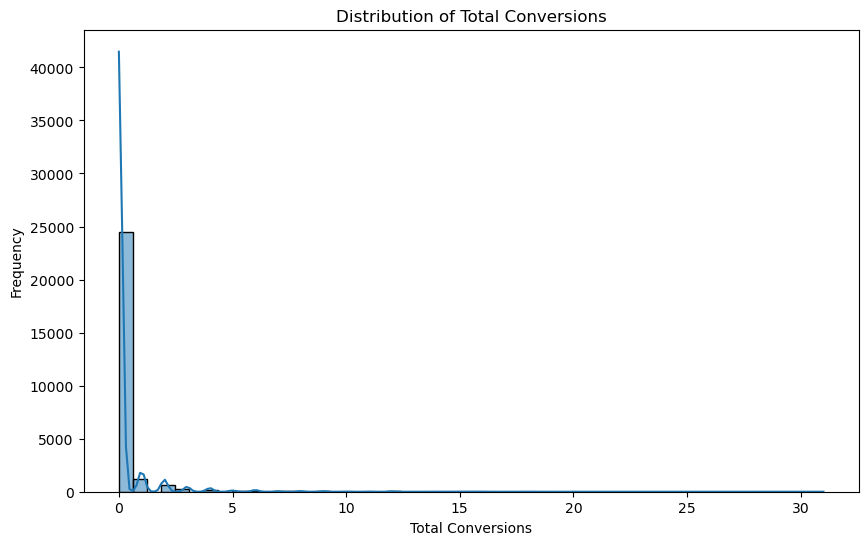

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'total_conversions' feature to show skewness
plt.figure(figsize=(10, 6))
sns.histplot(raw_se['total_conversions'], bins=50, kde=True)
plt.title('Distribution of Total Conversions')
plt.xlabel('Total Conversions')
plt.ylabel('Frequency')
plt.show()


In [190]:
# Count the number of non-zero and zero values in 'total_conversions'
non_zero_count = (raw_se['total_conversions'] != 0).sum()
zero_count = (raw_se['total_conversions'] == 0).sum()

print(f'Number of non-zero values: {non_zero_count}')
print(f'Number of zero values: {zero_count}')

# Filter out rows with zero values
zero_values = raw_se[raw_se['total_conversions'] == 0]

# Randomly sample zero values to match the number of non-zero values
sampled_zero_values = zero_values.sample(n=non_zero_count, random_state=42)

# Combine the sampled zero values with the non-zero values
non_zero_values = raw_se[raw_se['total_conversions'] != 0]
balanced_data = pd.concat([non_zero_values, sampled_zero_values])

# Check the new distribution
print(f'New count of non-zero values: {(balanced_data["total_conversions"] != 0).sum()}')
print(f'New count of zero values: {(balanced_data["total_conversions"] == 0).sum()}')
raw_se=balanced_data

Number of non-zero values: 2647
Number of zero values: 24469
New count of non-zero values: 2647
New count of zero values: 2647


### Load Smogn Dataset

In [13]:
# use for smogn
raw_se = pd.read_csv('balanced_dataset.csv')
# List of columns to convert from float to integer
columns_to_convert = ['time_of_day', 'impressions', 'clicks', 'oneweb_carconfig_engager',
       'oneweb_carconfig_user', 'oneweb_carconfig_lead',
       'oneweb_testdrive_user', 'oneweb_testdrive_engager',
       'oneweb_testdrive_lead', 'oneweb_contactform_lead',
       'oneweb_onlineshop_vehicle_sales_engager',
       'oneweb_onlineshop_vehicle_sales_user',
       'oneweb_onlineshop_vehicle_sales_lead']  

# Function to convert specified columns to integer by rounding
def convert_columns_to_int(data, columns):
    for column in columns:
        data[column] = data[column].astype(float).round().astype(int)
    return data

# Convert the columns
raw_se = convert_columns_to_int(raw_se, columns_to_convert)
print(f'New count of zero values: {(raw_se["total_conversions"] == 0).sum()}')


New count of zero values: 745


In [162]:
raw_se = pd.read_csv('balanced_dataset.csv')
# Calculate the percentage of zero and non-zero values in 'total_conversions' feature
zero_count = (raw_se['total_conversions'] == 0).sum()
non_zero_count = (raw_se['total_conversions'] != 0).sum()

total_count = raw_se['total_conversions'].count()

zero_percentage = (zero_count / total_count) * 100
non_zero_percentage = (non_zero_count / total_count) * 100

print(f"Percentage of zero values: {zero_percentage:.2f}%")
print(f"Percentage of non-zero values: {non_zero_percentage:.2f}%")

Percentage of zero values: 20.38%
Percentage of non-zero values: 79.62%


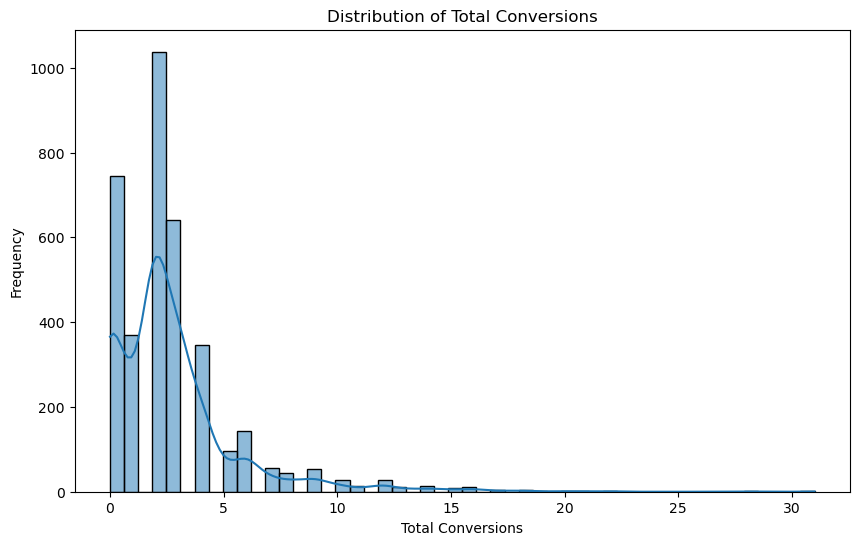

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'total_conversions' feature to show skewness
plt.figure(figsize=(10, 6))
sns.histplot(raw_se['total_conversions'], bins=50, kde=True)
plt.title('Distribution of Total Conversions')
plt.xlabel('Total Conversions')
plt.ylabel('Frequency')
plt.show()


# II. Eploratory Data Anlysis

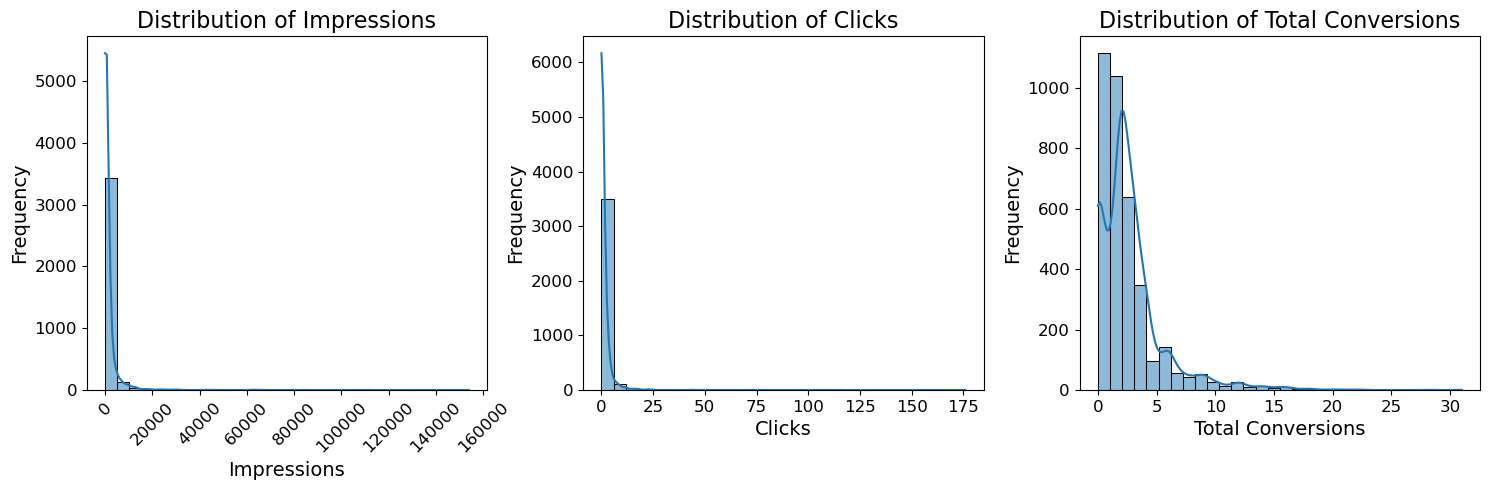

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of key features
plt.figure(figsize=(15, 5))

# Distribution of Impressions
plt.subplot(1, 3, 1)
sns.histplot(raw_se['impressions'], bins=30, kde=True)
plt.title('Distribution of Impressions', fontsize=16)
plt.xlabel('Impressions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(fontsize=12)

# Distribution of Clicks
plt.subplot(1, 3, 2)
sns.histplot(raw_se['clicks'], bins=30, kde=True)
plt.title('Distribution of Clicks', fontsize=16)
plt.xlabel('Clicks', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Distribution of Total Conversions
plt.subplot(1, 3, 3)
sns.histplot(raw_se['total_conversions'], bins=30, kde=True)
plt.title('Distribution of Total Conversions', fontsize=16)
plt.xlabel('Total Conversions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


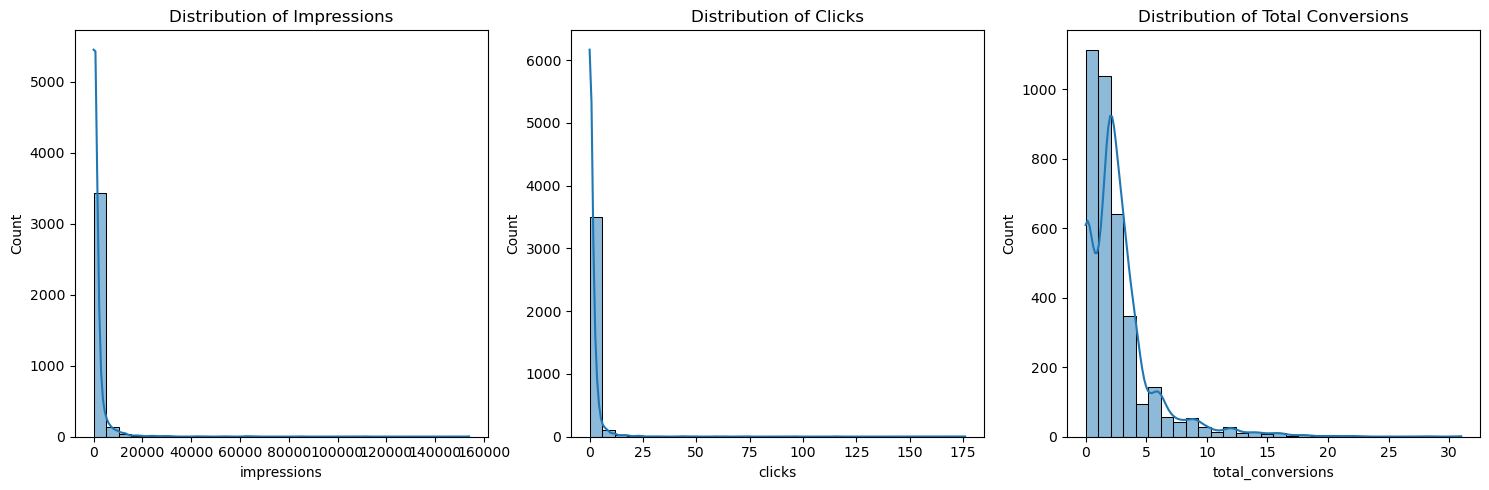

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of key features
plt.figure(figsize=(15, 5))

# Distribution of Impressions
plt.subplot(1, 3, 1)
sns.histplot(raw_se['impressions'], bins=30, kde=True)
plt.title('Distribution of Impressions')

# Distribution of Clicks
plt.subplot(1, 3, 2)
sns.histplot(raw_se['clicks'], bins=30, kde=True)
plt.title('Distribution of Clicks')

# Distribution of Total Conversions
plt.subplot(1, 3, 3)
sns.histplot(raw_se['total_conversions'], bins=30, kde=True)
plt.title('Distribution of Total Conversions')

plt.tight_layout()
plt.show()


C:\Users\ml23400\AppData\Local\Temp\ipykernel_18968\1018572300.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'impressions', 'clicks', 'total_conversions', 'conversion_rate']].corr()


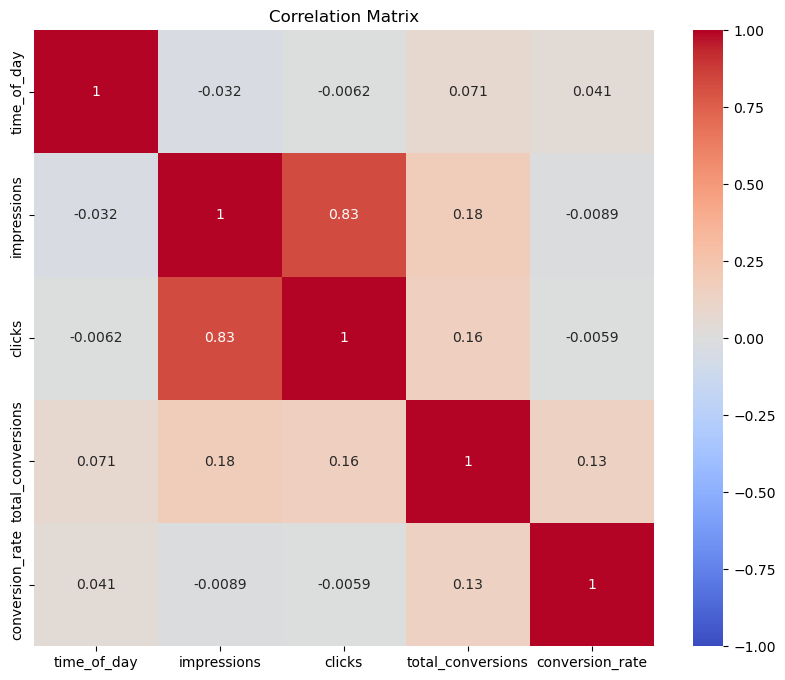

In [46]:
import seaborn as sns
data=df
# Create a new column for Conversion Rate (CVR)
data['conversion_rate'] = data['total_conversions'] / data['impressions']

# Drop rows with NaN or inf values in conversion_rate
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['conversion_rate'])

# Calculate correlations
correlation_matrix = data[['month', 'campaign', 'insertion_order', 'line_item', 'environment',
       'device_type', 'creative', 'browser', 'time_of_day', 'operating_system',
       'impressions', 'clicks', 'total_conversions', 'conversion_rate']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#### Plotting

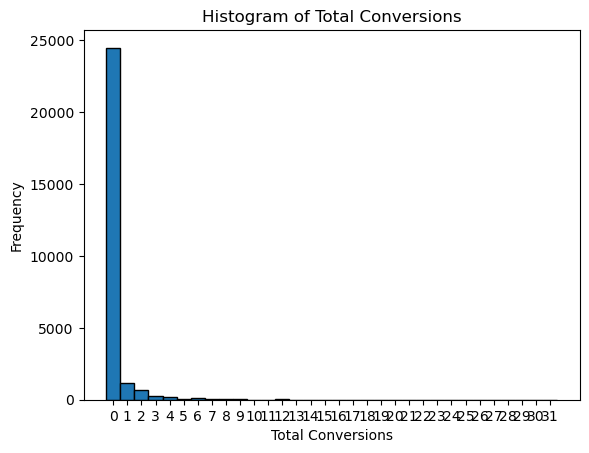

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# First, change the type of 'total_conversions' to integer
raw_se['total_conversions'] = raw_se['total_conversions'].astype(int)

# Filter out rows where 'total_conversions' is 0
filtered_df = raw_se[raw_se['total_conversions'] != 0]

# Creating a DataFrame for demonstration
df = pd.DataFrame(raw_se['total_conversions'], columns=['total_conversions'])

# Plotting the histogram
plt.hist(df['total_conversions'], bins=range(min(df['total_conversions']), max(df['total_conversions']) + 2), edgecolor='black', align='left')
plt.xlabel('Total Conversions')
plt.ylabel('Frequency')
plt.title('Histogram of Total Conversions')
plt.xticks(range(min(df['total_conversions']), max(df['total_conversions']) + 1))
plt.show()


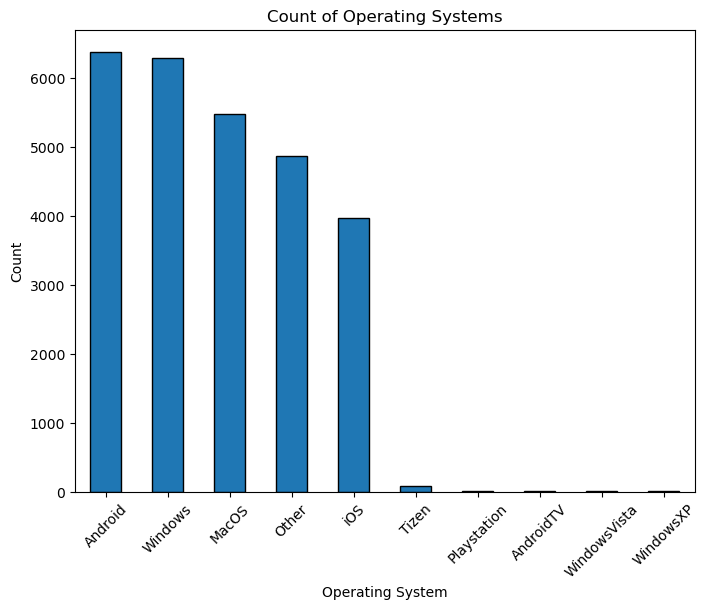

In [70]:


import pandas as pd
import matplotlib.pyplot as plt


os_counts = raw_se['operating_system'].value_counts()

# Plotting the count plot
plt.figure(figsize=(8, 6))
os_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Count of Operating Systems')
plt.xticks(rotation=45)
plt.show()

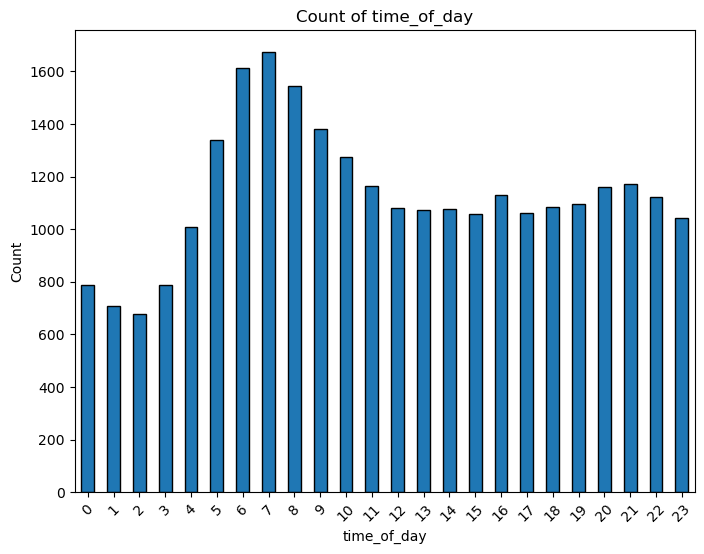

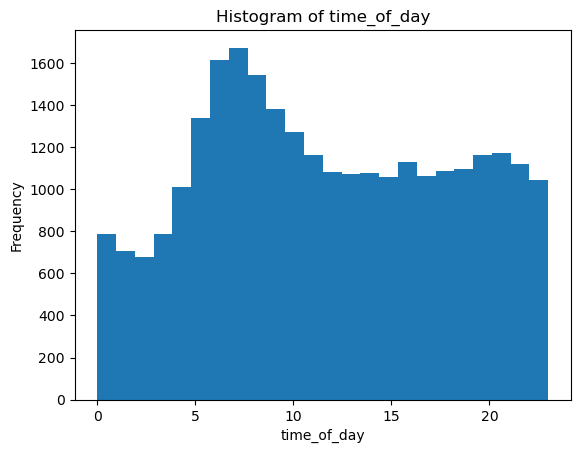

In [72]:
raw_se.time_of_day.hist(bins=24)
plt.title('Histogram of time_of_day')
plt.xlabel('time_of_day')
plt.ylabel('Frequency')
plt.grid(False)

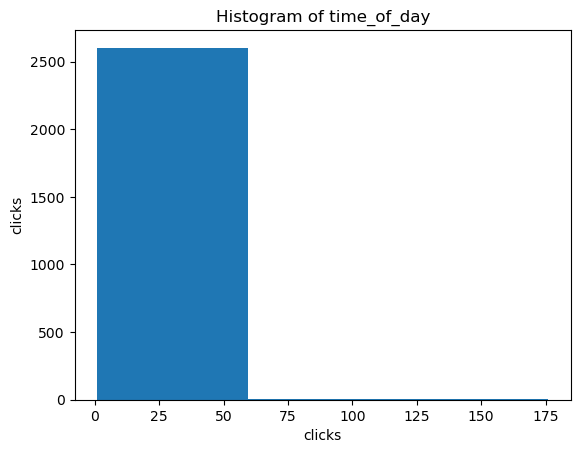

In [73]:
import matplotlib.pyplot as plt
df_filter = raw_se[raw_se.clicks!=0]

df_filter.clicks.hist(bins=3)
plt.title('Histogram of time_of_day')
plt.xlabel('clicks')
plt.ylabel('clicks')
plt.grid(False)

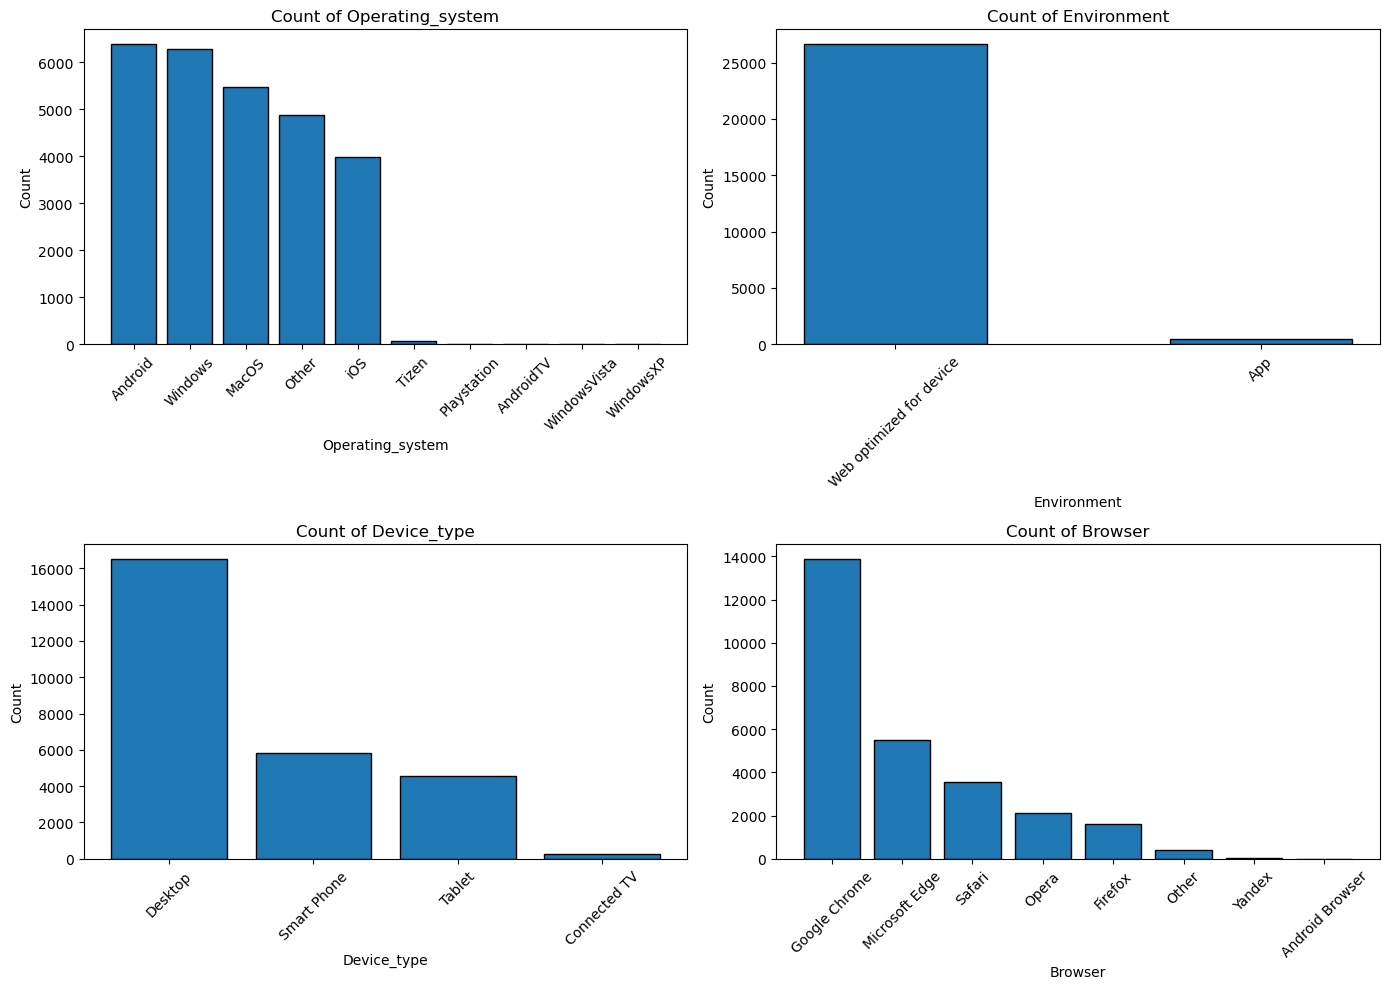

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the features to plot
features = ['operating_system', 'environment', 'device_type', 'browser']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each feature
for i, feature in enumerate(features):
    counts = raw_se[feature].value_counts()
    if feature == 'environment':
        # Adjust width and move columns closer for the environment chart
        axs[i].bar(counts.index, counts.values, width=0.5, edgecolor='black')  # Adjust the width here
    else:
        axs[i].bar(counts.index, counts.values, edgecolor='black')
    axs[i].set_title(f'Count of {feature.capitalize()}')
    axs[i].set_xlabel(feature.capitalize())
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Important Note:

**insertion_order, campaign** only have one value

**line_item** has 8 unique value

**creative** has 42 unique value

**os** has 10 

**conversion rate** has large number of value 0

**Device_type** has 4

**Browser** has 8

**Operating system** has 10

**Environement** has 2

*insertion_order*:  C.P.AO.RNG.LR_NA_RE_SE_2023 / Always on / 2024 / PRCH / Display / C-Class / VIB

*campaign*: C.P.AO.RNG.LR_NA_RE_SE_2023-2024 / Always on / Leads / Display / v1-52 / VIB    27151

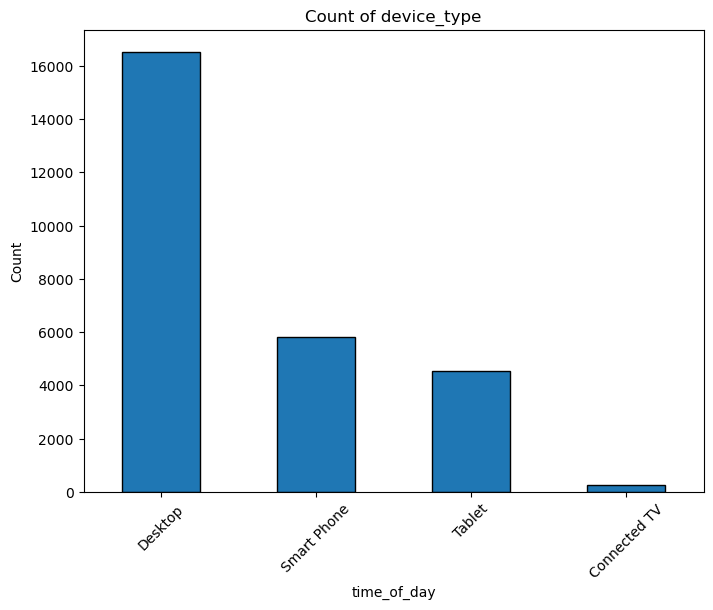

In [77]:
raw_se['device_type'].value_counts()

os_counts = raw_se['device_type'].value_counts()

# Plotting the count plot
plt.figure(figsize=(8, 6))
os_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('time_of_day')
plt.ylabel('Count')
plt.title('Count of device_type')
plt.xticks(rotation=45)
plt.show()

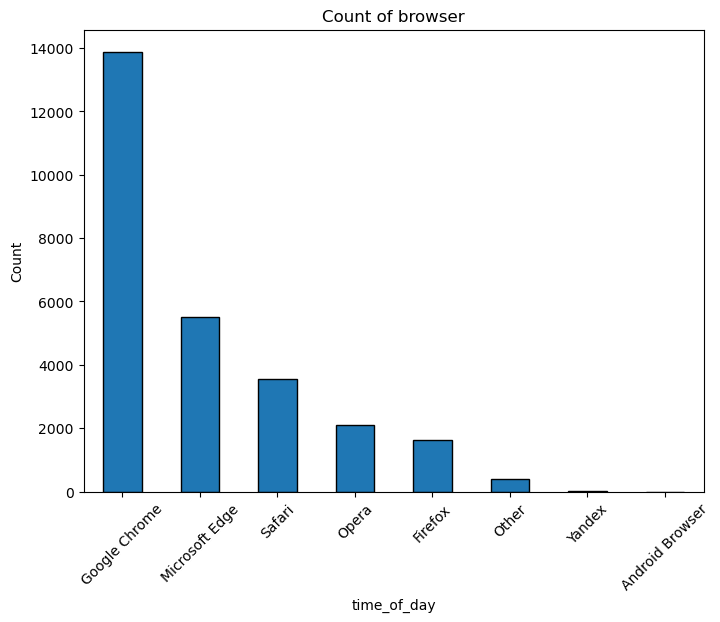

In [78]:
raw_se['browser'].value_counts()

os_counts = raw_se['browser'].value_counts()

# Plotting the count plot
plt.figure(figsize=(8, 6))
os_counts.plot(kind='bar',  edgecolor='black')
plt.xlabel('time_of_day')
plt.ylabel('Count')
plt.title('Count of browser')
plt.xticks(rotation=45)
plt.show()

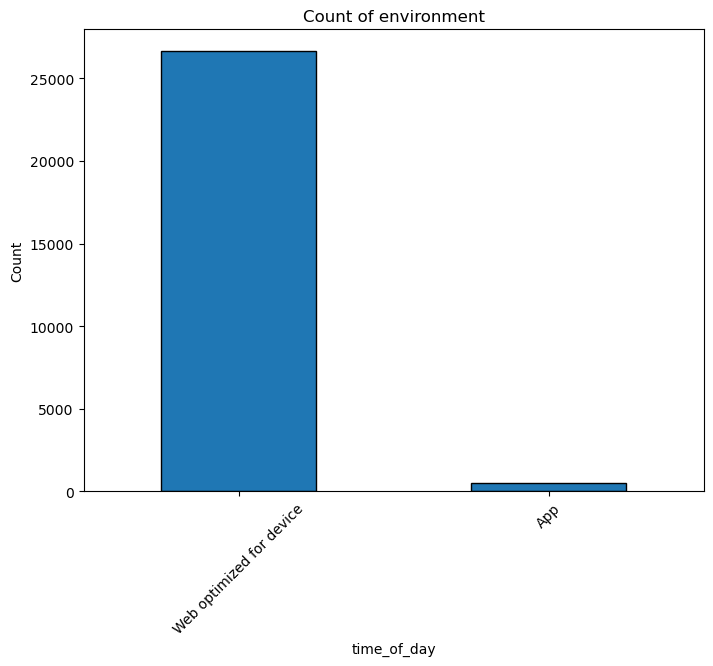

In [79]:
raw_se['environment'].value_counts()

os_counts = raw_se['environment'].value_counts()

# Plotting the count plot
plt.figure(figsize=(8, 6))
os_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('time_of_day')
plt.ylabel('Count')
plt.title('Count of environment')
plt.xticks(rotation=45)
plt.show()

# III. Feature Engineering

### Time of Day and CTR

In [2]:
raw_se['conversion_rate'] = raw_se['total_conversions'] / raw_se['impressions']

raw_se['click_through_rate'] = raw_se['clicks'] / raw_se['impressions']

def get_part_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Applying the function to the DataFrame
raw_se['part_of_day'] = raw_se['time_of_day'].apply(get_part_of_day)

raw_se = raw_se.fillna(0)

### Engagement ratio and Interaction feature

In [3]:
raw_se['carconfig_engager_to_user_ratio'] = raw_se['oneweb_carconfig_engager'] / raw_se['oneweb_carconfig_user']
raw_se['carconfig_lead_to_engager_ratio'] = raw_se['oneweb_carconfig_lead'] / raw_se['oneweb_carconfig_engager']

raw_se['testdrive_engager_to_user_ratio'] = raw_se['oneweb_testdrive_engager'] / raw_se['oneweb_testdrive_user']
raw_se['testdrive_lead_to_engager_ratio'] = raw_se['oneweb_testdrive_lead'] / raw_se['oneweb_testdrive_engager']

raw_se['onlineshop_vehicle_sales_engager_to_user_ratio'] = raw_se['oneweb_onlineshop_vehicle_sales_engager'] / raw_se['oneweb_onlineshop_vehicle_sales_user']
raw_se['onlineshop_vehicle_sales_lead_to_engager_ratio'] = raw_se['oneweb_onlineshop_vehicle_sales_lead'] / raw_se['oneweb_onlineshop_vehicle_sales_engager']

# Browser and Device Performance Metrics:
raw_se['avg_conversion_rate_by_device'] = raw_se.groupby('device_type')['conversion_rate'].transform('mean')
raw_se['avg_conversion_rate_by_browser'] = raw_se.groupby('browser')['conversion_rate'].transform('mean')
# Time of Day Performance Metrics
raw_se['avg_conversion_rate_by_time_of_day'] = raw_se.groupby('time_of_day')['conversion_rate'].transform('mean')
# Creative Performance Metrics
raw_se['avg_conversion_rate_by_creative'] = raw_se.groupby('creative')['conversion_rate'].transform('mean')
# Line Item Performance Metrics
raw_se['avg_conversion_rate_by_line_item'] = raw_se.groupby('line_item')['conversion_rate'].transform('mean')
# operating_system
raw_se['avg_conversion_rate_by_operating_system'] = raw_se.groupby('operating_system')['conversion_rate'].transform('mean')


#INTERACTION FEATURE

# Create interaction features (excluding campaign)
raw_se['device_browser_interaction'] = raw_se['device_type'].astype(str) + '_' + raw_se['browser'].astype(str)
raw_se['creative_environment_interaction'] = raw_se['creative'].astype(str) + '_' +raw_se['environment'].astype(str)
raw_se['device_time_of_day'] = raw_se['device_type'].astype(str) + '_' + raw_se['time_of_day'].astype(str)
raw_se['browser_os'] = raw_se['browser'].astype(str) + '_' + raw_se['operating_system'].astype(str)
raw_se['creative_line_item'] = raw_se['creative'].astype(str) + '_' + raw_se['line_item'].astype(str)
raw_se['environment_device'] = raw_se['environment'].astype(str) + '_' + raw_se['device_type'].astype(str)
raw_se['line_item_time_of_day'] = raw_se['line_item'].astype(str) + '_' + raw_se['time_of_day'].astype(str)
raw_se['os_device'] = raw_se['operating_system'].astype(str) + '_' + raw_se['device_type'].astype(str)
raw_se['clicks_impressions'] = raw_se['clicks'] * raw_se['impressions']


### Monthly metric feature

In [4]:
df=raw_se
raw_se['month'] = pd.to_datetime(raw_se['month'], format='%Y/%m')

raw_se['year'] = raw_se['month'].dt.year
raw_se['month_num'] = raw_se['month'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

raw_se['season'] = raw_se['month_num'].apply(get_season)


monthly_metrics = raw_se.groupby('month').agg({
    'clicks': 'sum',
    'impressions': 'sum',
    'conversion_rate': 'mean'
})

# Merge the monthly metrics back to the original dataframe
raw_se = raw_se.merge(monthly_metrics, on='month', suffixes=('', '_monthly'))


In [5]:
raw_se.season.value_counts()

Winter    20664
Spring     6452
Name: season, dtype: int64

In [6]:
fm_df = raw_se.copy()

# Drop columns with only one unique value
fm_df.drop(['insertion_order', 'campaign', 'month'], axis=1, inplace=True)
import pandas as pd

# Replace null values with 0
fm_df.fillna(0, inplace=True)

# Check for null values
null_values = fm_df.isnull().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])

import pandas as pd


Columns with null values:
Series([], dtype: int64)


In [7]:
mlp_df = raw_se.copy()

# Drop columns with only one unique value
mlp_df.drop(['insertion_order', 'campaign', 'month'], axis=1, inplace=True)
import pandas as pd

# Replace null values with 0
mlp_df.fillna(0, inplace=True)

# Check for null values
null_values = fm_df.isnull().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])

mlp_df.dropna(inplace=True)


import pandas as pd
# Check for categorical features
mlp_df_categorical_features = mlp_df.select_dtypes(include=['object', 'category']).columns
mlp_df_categorical_features

Columns with null values:
Series([], dtype: int64)


Index(['line_item', 'environment', 'device_type', 'creative', 'browser',
       'operating_system', 'part_of_day', 'device_browser_interaction',
       'creative_environment_interaction', 'device_time_of_day', 'browser_os',
       'creative_line_item', 'environment_device', 'line_item_time_of_day',
       'os_device', 'season'],
      dtype='object')

### Categorical feature encoding

Target Encoding: Used for line_item and creative.

One-Hot Encoding: Applied to device_type, browser, environment, and operating_system.

Label Encoding: Used for time_of_day and season.

Binary Encoding: Optionally used for creative if target encoding is insufficient.

Model Training: Followed the preprocessing steps with SMOTE for handling imbalance and trained a linear regression model.

In [9]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Drop columns with only one unique value
raw_se.drop(['insertion_order', 'campaign', 'month'], axis=1, inplace=True)

# Apply target encoding for 'line_item'
target_encoder = ce.TargetEncoder(cols=['line_item'])
raw_se = target_encoder.fit_transform(raw_se, raw_se['conversion_rate'])

# Apply binary encoding for 'creative'
binary_encoder = ce.BinaryEncoder(cols=['creative'])
raw_se = binary_encoder.fit_transform(raw_se)

# Apply one-hot encoding using pd.get_dummies for 'device_type', 'browser', 'environment', 'operating_system', and 'environment_device'
raw_se = pd.get_dummies(raw_se, columns=['device_type', 'browser', 'environment', 'operating_system', 'environment_device'], drop_first=True)

# Apply label encoding for 'time_of_day', 'season', and 'part_of_day'
label_encoders = {}
for col in ['time_of_day', 'season', 'part_of_day']:
    le = LabelEncoder()
    raw_se[col] = le.fit_transform(raw_se[col])
    label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
raw_se = binary_encoder.fit_transform(raw_se)

# Ensure no duplicate columns
raw_se = raw_se.loc[:, ~raw_se.columns.duplicated()]



In [10]:
import pandas as pd

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Display the columns
print(list(raw_se.columns))


['line_item', 'creative_0', 'creative_1', 'creative_2', 'creative_3', 'creative_4', 'creative_5', 'time_of_day', 'impressions', 'clicks', 'total_conversions', 'total_media_cost_advertiser_currency', 'oneweb_carconfig_engager', 'oneweb_carconfig_user', 'oneweb_carconfig_lead', 'oneweb_testdrive_user', 'oneweb_testdrive_engager', 'oneweb_testdrive_lead', 'oneweb_contactform_lead', 'oneweb_onlineshop_vehicle_sales_engager', 'oneweb_onlineshop_vehicle_sales_user', 'oneweb_onlineshop_vehicle_sales_lead', 'conversion_rate', 'click_through_rate', 'part_of_day', 'carconfig_engager_to_user_ratio', 'carconfig_lead_to_engager_ratio', 'testdrive_engager_to_user_ratio', 'testdrive_lead_to_engager_ratio', 'onlineshop_vehicle_sales_engager_to_user_ratio', 'onlineshop_vehicle_sales_lead_to_engager_ratio', 'avg_conversion_rate_by_device', 'avg_conversion_rate_by_browser', 'avg_conversion_rate_by_time_of_day', 'avg_conversion_rate_by_creative', 'avg_conversion_rate_by_line_item', 'avg_conversion_rate_by

In [11]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Check for categorical features
categorical_features = raw_se.select_dtypes(include=['object', 'category']).columns

print("Categorical Features:")
print(categorical_features)


Categorical Features:
Index([], dtype='object')


In [12]:
# Check for null values
null_values = raw_se.isnull().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
carconfig_engager_to_user_ratio                   24394
carconfig_lead_to_engager_ratio                   26805
testdrive_engager_to_user_ratio                   27063
testdrive_lead_to_engager_ratio                   27094
onlineshop_vehicle_sales_engager_to_user_ratio    27049
onlineshop_vehicle_sales_lead_to_engager_ratio    27099
dtype: int64


In [13]:
import pandas as pd

# Replace null values with 0
raw_se.fillna(0, inplace=True)

# Check for null values
null_values = raw_se.isnull().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
Series([], dtype: int64)


In [14]:
import pandas as pd
import numpy as np

# Replace infinity values with NaN
raw_se.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for any infinity values
has_infinity = np.isinf(raw_se.to_numpy()).any()

if has_infinity:
    print("There are infinity values in the DataFrame.")
else:
    print("There are no infinity values in the DataFrame.")



There are no infinity values in the DataFrame.


In [15]:
import pandas as pd

# Check for the number of non-null entries in each column
non_null_counts = raw_se.notnull().sum()

# Check if all columns have the same number of non-null entries
equal_rows = non_null_counts.nunique() == 1

if equal_rows:
    print("All columns have the same number of rows.")
else:
    print("Columns have different numbers of rows.")

print("\nNumber of non-null entries in each column:")
print(non_null_counts)


raw_se.dropna(inplace=True)

Columns have different numbers of rows.

Number of non-null entries in each column:
line_item                                                   27116
creative_0                                                  27116
creative_1                                                  27116
creative_2                                                  27116
creative_3                                                  27116
                                                            ...  
environment_device_App_Tablet                               27116
environment_device_Web optimized for device_Connected TV    27116
environment_device_Web optimized for device_Desktop         27116
environment_device_Web optimized for device_Smart Phone     27116
environment_device_Web optimized for device_Tablet          27116
Length: 114, dtype: int64


# VI. Model implementation

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [405]:
# pip install torchfm

## 1.Linear Regression

In [279]:
# Check for null values
null_values = raw_se.isna().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
Series([], dtype: int64)


In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import category_encoders as ce
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# # Replace infinite values with NaN and drop rows with NaN in 'conversion_rate'
# raw_se.replace([np.inf, -np.inf], np.nan, inplace=True)
# raw_se.dropna(subset=['conversion_rate'], inplace=True)

# Drop columns that cannot be easily converted or are not relevant for prediction
X = raw_se.drop(['conversion_rate'], axis=1)
y = raw_se['conversion_rate']

# # Encode categorical variables if necessary
# # Encode categorical variables using Target Encoder
# categorical_cols = ['line_item', 'creative', 'operating_system', 'season', 'part_of_day']
# encoder = ce.TargetEncoder(cols=categorical_cols)
# X_encoded = encoder.fit_transform(raw_se[categorical_cols], y)

# # Combine encoded categorical columns with numerical columns
# X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Change column names to strings
X.columns = X.columns.astype(str)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0039729797480072705
Mean Absolute Error: 0.008611083340124556
R^2 Score: 0.02495698975246896


#### Shap value

Mean Squared Error: 0.02346686189536705
Mean Absolute Error: 0.05196881688903988
R^2 Score: 0.03339304938694698


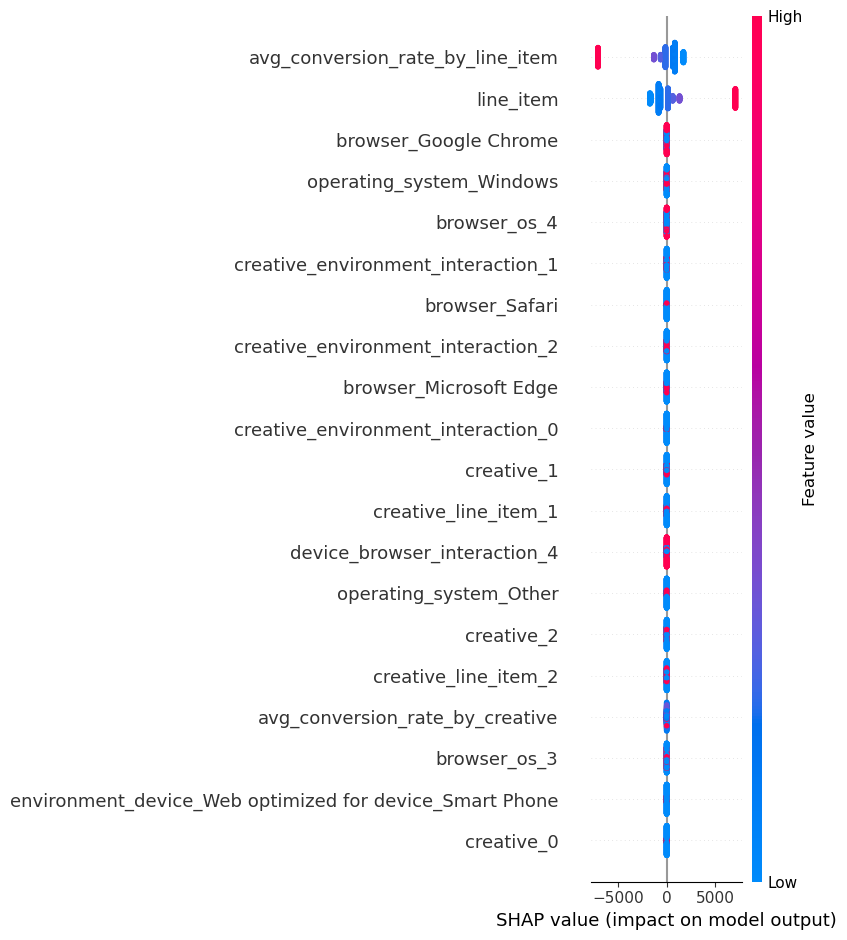

In [140]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap



# Drop columns that cannot be easily converted or are not relevant for prediction
X = raw_se.drop(['conversion_rate'], axis=1)
y = raw_se['conversion_rate']

# Change column names to strings
X.columns = X.columns.astype(str)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Calculate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)


## 2.Factorization Machine

In [ ]:
# pip install numpy==1.21.5
# pip install scipy==1.7.3
# pip install scikit-learn==0.24.2

### Base model

In [191]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from fastFM import als
from scipy import sparse
import category_encoders as ce

data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with 0 (or handle accordingly)
data.fillna(0, inplace=True)

target = ['conversion_rate']

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Normalization for dense features
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Split data into features (X) and target (y)
X = data.drop(target, axis=1).values
y = data[target].values.ravel()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Convert the dense matrix to sparse matrix
X_train_sparse = sparse.csr_matrix(X_train)
X_test_sparse = sparse.csr_matrix(X_test)

# Define the FastFM model
fm = als.FMRegression(n_iter=1000, init_stdev=0.01, rank=8, l2_reg_w=0.1, l2_reg_V=0.1)

# Train the model
fm.fit(X_train_sparse, y_train)

# Make predictions
y_pred = fm.predict(X_test_sparse)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Predictions range:", np.min(y_pred), np.max(y_pred))

# Print some predictions
print("\nPredictions on test data:")
for i in range(5):  # Print first 5 predictions
    print(f"Input: {X_test[i]}, Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]:.2f}")


Mean Squared Error (MSE): 0.019818361616340225
Mean Absolute Error (MAE): 0.05286333027768456
Predictions range: -0.18950145550392405 0.3962437085367022

Predictions on test data:
Input: [9.35765705e-03 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 1.00000000e+00 0.00000000e+00 3.91304348e-01
 9.29090271e-04 0.00000000e+00 0.00000000e+00 6.51430180e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 6.71484792e-01
 2.64458595e-01 1.99145934e-01 6.98745888e-02 5.94113373e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00

In [193]:
mse = r2_score(y_test, y_pred)

print("R2 score for this prediction is:", mse)


R2 score for this prediction is: -0.02369732254967616


### Hyper tune for FM

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from fastFM import als
from scipy import sparse
import category_encoders as ce

# Load data
data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with 0 (or handle accordingly)
data.fillna(0, inplace=True)

target = ['conversion_rate']

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Normalization for dense features
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Split data into features (X) and target (y)
X = data.drop(target, axis=1).values
y = data[target].values.ravel()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Convert the dense matrix to sparse matrix
X_train_sparse = sparse.csr_matrix(X_train)
X_test_sparse = sparse.csr_matrix(X_test)

# Define the FastFM model
fm = als.FMRegression()

# Define the hyperparameter grid
param_dist = {
    'n_iter': [500, 1000, 1500],
    'init_stdev': [0.01, 0.1, 0.5],
    'rank': [4, 8, 16, 32],
    'l2_reg_w': [0.01, 0.1, 1],
    'l2_reg_V': [0.01, 0.1, 1]
}

# Perform random search
random_search = RandomizedSearchCV(estimator=fm, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=2023)
random_search.fit(X_train_sparse, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
fm_best = als.FMRegression(
    n_iter=best_params['n_iter'],
    init_stdev=best_params['init_stdev'],
    rank=best_params['rank'],
    l2_reg_w=best_params['l2_reg_w'],
    l2_reg_V=best_params['l2_reg_V']
)

fm_best.fit(X_train_sparse, y_train)

# Make predictions
y_pred = fm_best.predict(X_test_sparse)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Predictions range:", np.min(y_pred), np.max(y_pred))
print("R-squared (R2):", r2)

# Print some predictions
print("\nPredictions on test data:")
for i in range(5):  # Print first 5 predictions
    print(f"Input: {X_test[i]}, Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'rank': 4, 'n_iter': 1500, 'l2_reg_w': 0.01, 'l2_reg_V': 1, 'init_stdev': 0.01}
[CV] END init_stdev=0.5, l2_reg_V=0.1, l2_reg_w=0.01, n_iter=1000, rank=4; total time= 1.0min
[CV] END init_stdev=0.5, l2_reg_V=0.1, l2_reg_w=1, n_iter=1500, rank=16; total time= 6.3min
[CV] END init_stdev=0.01, l2_reg_V=0.1, l2_reg_w=1, n_iter=1500, rank=4; total time= 2.4min
[CV] END init_stdev=0.01, l2_reg_V=0.01, l2_reg_w=0.1, n_iter=1000, rank=16; total time= 5.0min
[CV] END init_stdev=0.01, l2_reg_V=1, l2_reg_w=0.01, n_iter=1500, rank=4; total time= 1.5min
[CV] END init_stdev=0.5, l2_reg_V=0.1, l2_reg_w=1, n_iter=1500, rank=32; total time=13.5min
[CV] END init_stdev=0.01, l2_reg_V=1, l2_reg_w=0.01, n_iter=1500, rank=4; total time= 1.5min
[CV] END init_stdev=0.5, l2_reg_V=0.1, l2_reg_w=1, n_iter=1500, rank=32; total time=13.5min
[CV] END init_stdev=0.5, l2_reg_V=0.1, l2_reg_w=0.1, n_iter=500, rank=16; total time= 1.6m

## 3.XGBoost

### Reduce Over fitting

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import category_encoders as ce
import xgboost as xgb

df=raw_se.copy()

# Drop columns that cannot be easily converted or are not relevant for prediction
X = df.drop(['conversion_rate'], axis=1)
y = df['conversion_rate']


# Change column names to strings
X.columns = X.columns.astype(str)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor model with regularization
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,
                         reg_alpha=1,  # L1 regularization term on weights
                         reg_lambda=1,  # L2 regularization term on weights
                         n_estimators=1000)  # Set a high number of trees, no early stopping for cross-validation

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

mse_scores = -mse_scores
mae_scores = -mae_scores

print(f"Mean Squared Error (cross-validated): {mse_scores.mean()}")
print(f"Mean Absolute Error (cross-validated): {mae_scores.mean()}")
print(f"R^2 Score (cross-validated): {r2_scores.mean()}")

# Train the model with early stopping on the whole training set
final_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,
                               reg_alpha=1,  # L1 regularization term on weights
                               reg_lambda=1,  # L2 regularization term on weights
                               n_estimators=1000,  # Set a high number of trees
                               early_stopping_rounds=10)  # Stop if no improvement after 10 rounds

final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"Final Model Mean Squared Error: {final_mse}")
print(f"Final Model Mean Absolute Error: {final_mae}")
print(f"Final Model R^2 Score: {final_r2}")


# Get feature importances
importances = final_model.feature_importances_
feature_names = X.columns

# Combine feature names and importances into a DataFrame
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the top 20 features
print('Top 20 features:')
print(feature_importances_df.head(20))
top_20_features = feature_importances_df.head(20)['Feature'].tolist()

Mean Squared Error (cross-validated): 0.0001676752057079089
Mean Absolute Error (cross-validated): 0.0007247055927075963
R^2 Score (cross-validated): 0.9458472563398234
Final Model Mean Squared Error: 0.0002277578577650378
Final Model Mean Absolute Error: 0.0007130506007965338
Final Model R^2 Score: 0.9441039921348361
Top 20 features:
                                    Feature  Importance
8                               impressions    0.756938
10                        total_conversions    0.118929
11     total_media_cost_advertiser_currency    0.066074
37             device_browser_interaction_1    0.013381
15                    oneweb_testdrive_user    0.009218
51                     device_time_of_day_3    0.006681
54                     device_time_of_day_6    0.006277
33          avg_conversion_rate_by_creative    0.003726
0                                 line_item    0.002956
7                               time_of_day    0.002490
52                     device_time_of_day_4    

### Raw data without feature engineering

In [459]:
#without encode

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import category_encoders as ce
import xgboost as xgb

# Copy the raw dataset
df = raw_se.copy()

# Separate features and target variable
X = df.drop(['conversion_rate'], axis=1)
y = df['conversion_rate']

# Change column names to strings
X.columns = X.columns.astype(str)

# Identify sparse (categorical) features
sparse_features = X.select_dtypes(include=['object']).columns.tolist()

# Label encode sparse features
for col in sparse_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor model with regularization
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,
                         reg_alpha=1,  # L1 regularization term on weights
                         reg_lambda=1,  # L2 regularization term on weights
                         n_estimators=1000)  # Set a high number of trees, no early stopping for cross-validation

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Convert negative scores to positive
mse_scores = -mse_scores
mae_scores = -mae_scores

# Print cross-validated metrics
print(f"Mean Squared Error (cross-validated): {mse_scores.mean()}")
print(f"Mean Absolute Error (cross-validated): {mae_scores.mean()}")
print(f"R^2 Score (cross-validated): {r2_scores.mean()}")

# Train the model with early stopping on the whole training set
final_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,
                               reg_alpha=1,  # L1 regularization term on weights
                               reg_lambda=1,  # L2 regularization term on weights
                               n_estimators=1000,  # Set a high number of trees
                               early_stopping_rounds=10)  # Stop if no improvement after 10 rounds

final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"Final Model Mean Squared Error: {final_mse}")
print(f"Final Model Mean Absolute Error: {final_mae}")
print(f"Final Model R^2 Score: {final_r2}")

# Get feature importances
importances = final_model.feature_importances_
feature_names = X.columns

# Combine feature names and importances into a DataFrame
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the top 20 features
print('Top 20 features:')
print(feature_importances_df.head(20))


Mean Squared Error (cross-validated): 0.00012894607073955688
Mean Absolute Error (cross-validated): 0.0006748550272416174
R^2 Score (cross-validated): 0.9609121121306388
Final Model Mean Squared Error: 5.11430408181936e-05
Final Model Mean Absolute Error: 0.0005403832867763682
Final Model R^2 Score: 0.9814953195301461
Top 20 features:
                                 Feature    Importance
13  total_media_cost_advertiser_currency  5.796013e-01
10                           impressions  3.214127e-01
12                     total_conversions  7.934815e-02
3                              line_item  6.425724e-03
4                            environment  4.684049e-03
20               oneweb_contactform_lead  2.283245e-03
8                            time_of_day  2.148656e-03
5                            device_type  1.875223e-03
11                                clicks  1.030874e-03
9                       operating_system  3.777101e-04
0                                  month  2.675333e-04
17 

### Feature engineering 


Cross-validation results:
Mean Squared Error (cross-validated): 0.000331 (+/- 0.000363)
Mean Absolute Error (cross-validated): 0.001996 (+/- 0.000238)
R^2 Score (cross-validated): 0.896520 (+/- 0.065812)
[0]	train-rmse:0.05202	train-mae:0.00777	eval-rmse:0.07967	eval-mae:0.00942
[100]	train-rmse:0.02858	train-mae:0.00395	eval-rmse:0.04880	eval-mae:0.00507
[200]	train-rmse:0.01762	train-mae:0.00230	eval-rmse:0.03368	eval-mae:0.00316
[298]	train-rmse:0.01483	train-mae:0.00192	eval-rmse:0.02984	eval-mae:0.00269

Final model results:
Final Model Mean Squared Error: 0.000043
Final Model Mean Absolute Error: 0.001484
Final Model R^2 Score: 0.933245


<Figure size 1000x800 with 0 Axes>

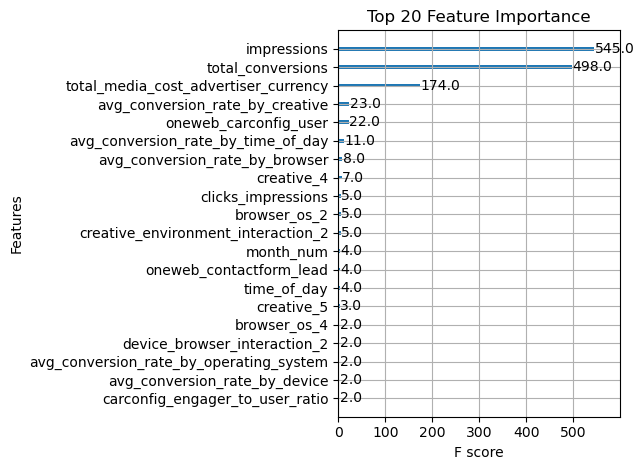

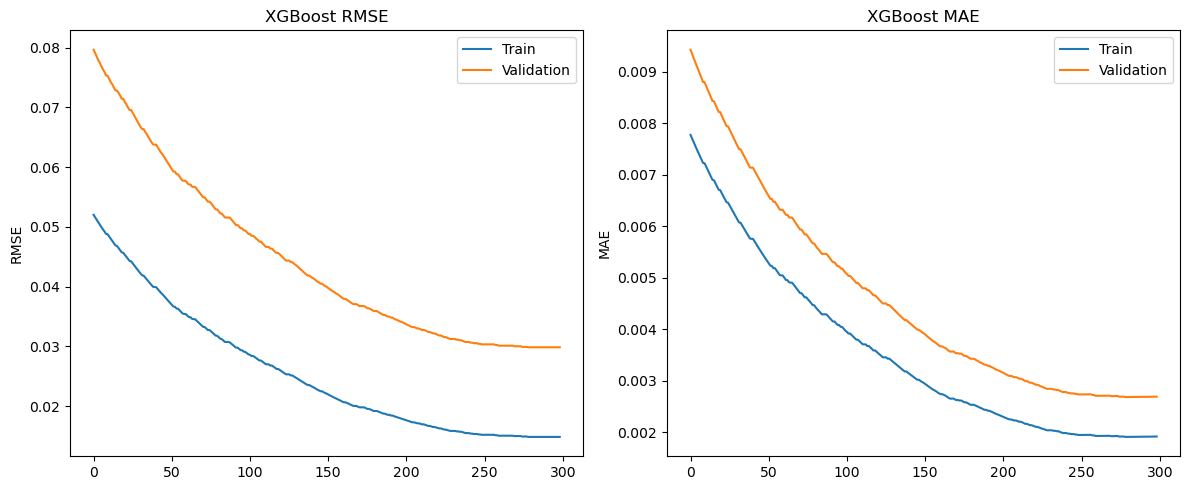


Best iteration: 278

Top 10 most important features:
impressions: 545.0
total_conversions: 498.0
total_media_cost_advertiser_currency: 174.0
avg_conversion_rate_by_creative: 23.0
oneweb_carconfig_user: 22.0
avg_conversion_rate_by_time_of_day: 11.0
avg_conversion_rate_by_browser: 8.0
creative_4: 7.0
creative_environment_interaction_2: 5.0
browser_os_2: 5.0


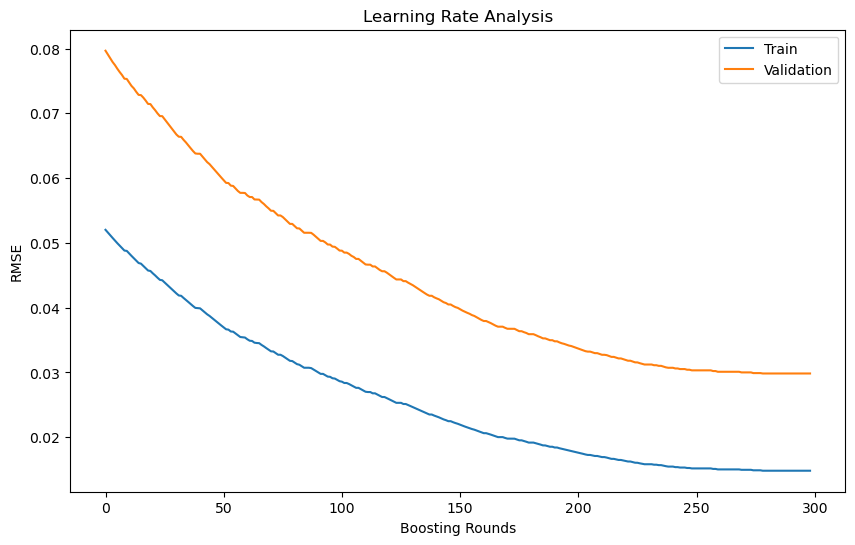

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

df = raw_se.copy()

# Prepare the data
X = df.drop(['conversion_rate'], axis=1)
y = df['conversion_rate']
X.columns = X.columns.astype(str)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an XGBoost regressor model with adjusted parameters
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=500,
    learning_rate=0.01,
    max_depth=5,
    min_child_weight=2,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0
)

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

mse_scores = -mse_scores
mae_scores = -mae_scores

print("Cross-validation results:")
print(f"Mean Squared Error (cross-validated): {mse_scores.mean():.6f} (+/- {mse_scores.std() * 2:.6f})")
print(f"Mean Absolute Error (cross-validated): {mae_scores.mean():.6f} (+/- {mae_scores.std() * 2:.6f})")
print(f"R^2 Score (cross-validated): {r2_scores.mean():.6f} (+/- {r2_scores.std() * 2:.6f})")

# Train the final model with early stopping
params = {
    'objective': 'reg:squarederror',
    'eval_metric': ['rmse', 'mae'],
    'random_state': 42,
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_child_weight': 2,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
}

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Train the model
eval_list = [(dtrain, 'train'), (dval, 'eval')]
evals_result = {}
final_model = xgb.train(params, dtrain, num_boost_round=1000,
                        evals=eval_list, early_stopping_rounds=20, 
                        verbose_eval=100, evals_result=evals_result)

# Make predictions on the test set
dtest = xgb.DMatrix(X_test)
y_pred = final_model.predict(dtest)

# Evaluate the final model
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print("\nFinal model results:")
print(f"Final Model Mean Squared Error: {final_mse:.6f}")
print(f"Final Model Mean Absolute Error: {final_mae:.6f}")
print(f"Final Model R^2 Score: {final_r2:.6f}")

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(final_model, max_num_features=20)
plt.title("Top 20 Feature Importance")
plt.tight_layout()
plt.show()

# Plot learning curves
epochs = len(evals_result['train']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')

plt.subplot(122)
plt.plot(x_axis, evals_result['train']['mae'], label='Train')
plt.plot(x_axis, evals_result['eval']['mae'], label='Validation')
plt.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE')

plt.tight_layout()
plt.show()

# Print the best iteration
print(f"\nBest iteration: {final_model.best_iteration}")

# Feature importance
feature_importance = final_model.get_score(importance_type='weight')
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 most important features:")
for feature, importance in sorted_importance[:10]:
    print(f"{feature}: {importance}")

# Learning rate analysis
plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Learning Rate Analysis')
plt.legend()
plt.show()

### Feature Importance 

In [42]:

# Get feature importances
importances = final_model.feature_importances_
feature_names = X.columns

# Combine feature names and importances into a DataFrame
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print('top 5:', feature_importances_df.head(25))
# print('bottom 5:', feature_importances_df.tail(10))

#put those feature in list
top_20_features = feature_importances_df.head(20)['Feature'].tolist()


top 5:                                      Feature  Importance
8                                impressions    0.756938
10                         total_conversions    0.118929
11      total_media_cost_advertiser_currency    0.066074
37              device_browser_interaction_1    0.013381
15                     oneweb_testdrive_user    0.009218
51                      device_time_of_day_3    0.006681
54                      device_time_of_day_6    0.006277
33           avg_conversion_rate_by_creative    0.003726
0                                  line_item    0.002956
7                                time_of_day    0.002490
52                      device_time_of_day_4    0.001524
6                                 creative_5    0.001177
18                   oneweb_contactform_lead    0.001140
5                                 creative_4    0.001126
30             avg_conversion_rate_by_device    0.001103
24           carconfig_engager_to_user_ratio    0.000733
68                   lin

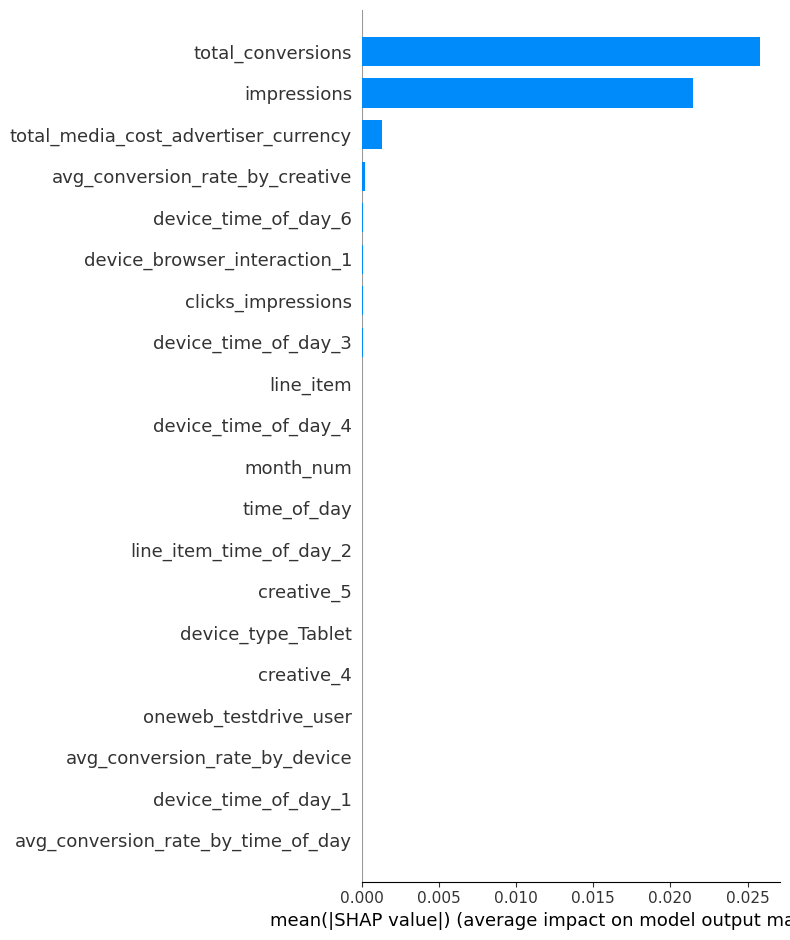

In [46]:
import shap
sample_size = 50
X_test_sample = X_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer
explainer = shap.Explainer(final_model)

# Calculate SHAP values for the sampled test set
shap_values = explainer(X_test_sample)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_sample, plot_type='bar')

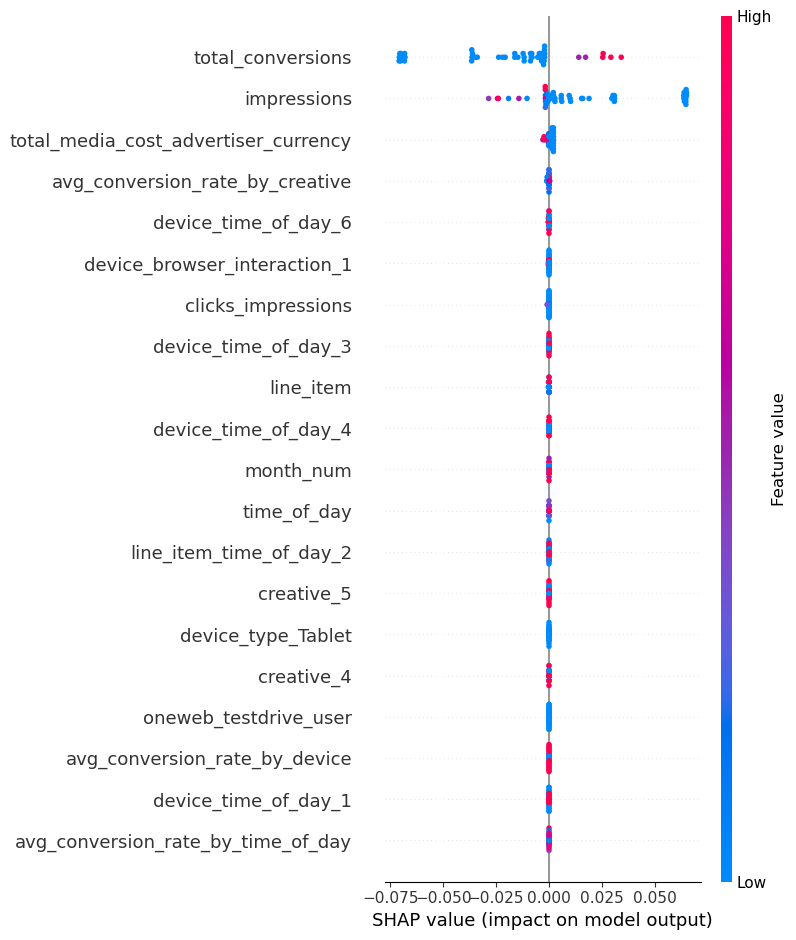

In [47]:
shap.summary_plot(shap_values, X_test_sample)

## 4.FinalMLP 

Require tensorflow version 2.12+, source code need to be modified for regression problem, remove sigmoid function at the last line.

In [16]:
# pip install tensorflow==2.12
# pip install protobuf==3.20.*

#### Final mlp with encoded dataset:



In [94]:
import importlib
import final_mlp
importlib.reload(final_mlp)
from final_mlp import FinalMLP


import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import category_encoders as ce
from final_mlp import FinalMLP

data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with 0 
data.fillna(0, inplace=True)

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Normalization for dense features
if dense_features:
    mms = MinMaxScaler(feature_range=(0, 1))
    data[dense_features] = mms.fit_transform(data[dense_features])

# Re-identify sparse and dense features after encoding
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + ['conversion_rate']]
dense_features_after_encoding = dense_features

# Define the input and target variables
X = data.drop(columns=['conversion_rate'])
y = data['conversion_rate'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2023)

# Convert to TensorFlow datasets
def create_tf_dataset(X, y, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((X.values, y))
    dataset = dataset.batch(batch_size)
    return dataset

train_data = create_tf_dataset(X_train, y_train)
val_data = create_tf_dataset(X_val, y_val)

# Define the model using FinalMLP
num_features = X_train.shape[1]
num_embedding = sum(data[feat].nunique() for feat in sparse_features_after_encoding if feat in data.columns)

model = FinalMLP(
    dim_input=num_features,
    num_embedding=num_embedding,
    dim_embedding=32,
    dropout=0.5,
)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mean_squared_error")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping, reduce_lr],
)

# Prepare the test dataset
test_data = X_val
y_test = y_val

# Make predictions
y_pred = model.predict(test_data.values)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")


Epoch 1/50
12/12 [==============================] - 8s 425ms/step - loss: 0.3365 - val_loss: 0.0241 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 5s 409ms/step - loss: 0.0646 - val_loss: 0.0243 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 5s 405ms/step - loss: 0.0292 - val_loss: 0.0244 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 5s 405ms/step - loss: 0.0225 - val_loss: 0.0242 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 5s 416ms/step - loss: 0.0200 - val_loss: 0.0244 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 5s 408ms/step - loss: 0.0187 - val_loss: 0.0242 - lr: 0.0010
Epoch 7/50
12/12 [==============================] - 5s 401ms/step - loss: 0.0180 - val_loss: 0.0243 - lr: 5.0000e-04
Epoch 8/50
12/12 [==============================] - 5s 410ms/step - loss: 0.0175 - val_loss: 0.0244 - lr: 5.0000e-04
Epoch 9/50
12/12 [==============================] - 5s 411ms/step - loss: 0.0168 - val_l

#### Updated Feature Identification:

Epoch 1/50
85/85 [==============================] - 42s 476ms/step - loss: 0.0515 - val_loss: 0.0035 - lr: 0.0010
Epoch 2/50
85/85 [==============================] - 42s 499ms/step - loss: 0.0034 - val_loss: 0.0035 - lr: 0.0010
Epoch 3/50
85/85 [==============================] - 43s 510ms/step - loss: 0.0030 - val_loss: 0.0034 - lr: 0.0010
Epoch 4/50
85/85 [==============================] - 44s 512ms/step - loss: 0.0029 - val_loss: 0.0034 - lr: 0.0010
Epoch 5/50
85/85 [==============================] - 43s 506ms/step - loss: 0.0029 - val_loss: 0.0034 - lr: 0.0010
Epoch 6/50
85/85 [==============================] - 42s 493ms/step - loss: 0.0029 - val_loss: 0.0034 - lr: 0.0010
Epoch 7/50
85/85 [==============================] - 42s 494ms/step - loss: 0.0028 - val_loss: 0.0034 - lr: 5.0000e-04
Epoch 8/50
85/85 [==============================] - 42s 498ms/step - loss: 0.0028 - val_loss: 0.0034 - lr: 5.0000e-04
Epoch 9/50
85/85 [==============================] - 42s 500ms/step - loss: 0.002

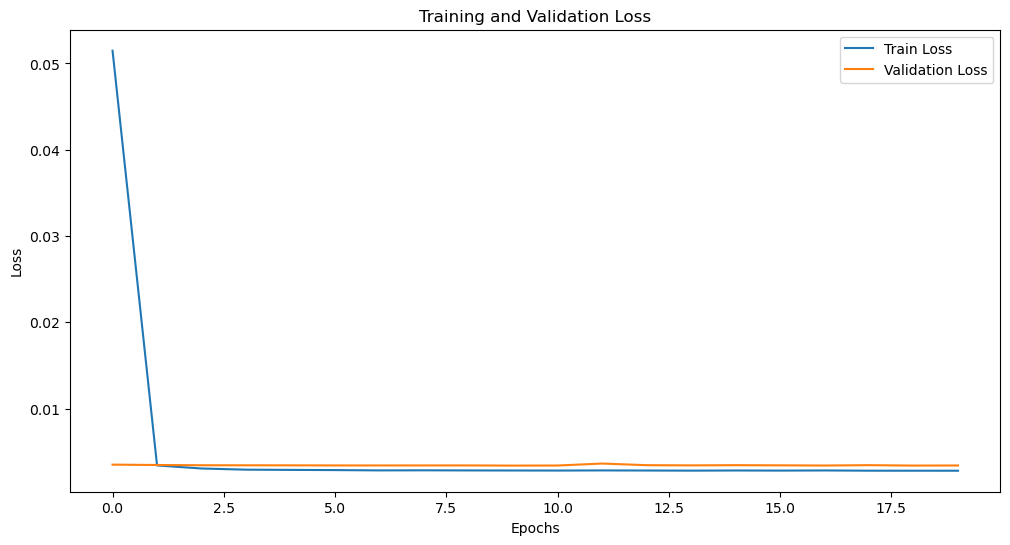

170/170 [==============================] - 4s 21ms/step
Mean Squared Error (MSE): 0.0033822300442381058
Mean Absolute Error (MAE): 0.008525765018954391
R-squared: 0.011519144383603686


In [297]:
import importlib
import final_mlp
importlib.reload(final_mlp)
from final_mlp import FinalMLP

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, History
import category_encoders as ce

# Load data
data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with 0 
data.fillna(0, inplace=True)

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Normalization for dense features
if dense_features:
    mms = MinMaxScaler(feature_range=(0, 1))
    data[dense_features] = mms.fit_transform(data[dense_features])

# Re-identify sparse and dense features after encoding
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + ['conversion_rate']]
dense_features_after_encoding = dense_features

# Define the input and target variables
X = data.drop(columns=['conversion_rate'])
y = data['conversion_rate'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2023)

# Convert to TensorFlow datasets
def create_tf_dataset(X, y, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((X.values, y))
    dataset = dataset.batch(batch_size)
    return dataset

train_data = create_tf_dataset(X_train, y_train)
val_data = create_tf_dataset(X_val, y_val)

# Define the model using FinalMLP
num_features = X_train.shape[1]
num_embedding = sum(data[feat].nunique() for feat in sparse_features_after_encoding if feat in data.columns)

model = FinalMLP(
    dim_input=num_features,
    num_embedding=num_embedding,
    dim_embedding=32,
    dropout=0.5,
)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mean_squared_error")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
history = History()

# Train the model
model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, history],
    verbose=1
)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prepare the test dataset
test_data = X_val
y_test = y_val

# Make predictions
y_pred = model.predict(test_data.values)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")


####  Code for model improvement

Number of features: 113
Number of unique categorical values: 0
Epoch 1/50
43/43 [==============================] - 1s 12ms/step - loss: 0.0191 - val_loss: 0.0042 - lr: 5.0000e-04
Epoch 2/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0065 - val_loss: 0.0031 - lr: 5.0000e-04
Epoch 3/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0046 - val_loss: 0.0027 - lr: 5.0000e-04
Epoch 4/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0026 - lr: 5.0000e-04
Epoch 5/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0034 - val_loss: 0.0025 - lr: 5.0000e-04
Epoch 6/50
43/43 [==============================] - 0s 11ms/step - loss: 0.0033 - val_loss: 0.0024 - lr: 5.0000e-04
Epoch 7/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0024 - lr: 5.0000e-04
Epoch 8/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0031 - val_loss: 0.0024 - lr: 5.0000e-04
Epoch 9/5

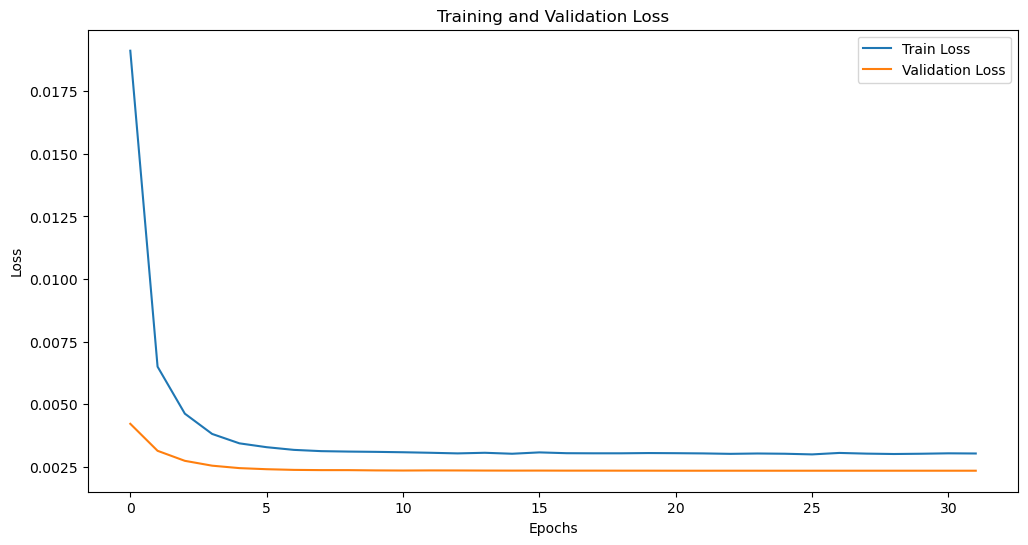

In [429]:
import importlib
import final_mlp
importlib.reload(final_mlp)
from final_mlp import FinalMLP

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, History
import category_encoders as ce
import matplotlib.pyplot as plt

data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Handle infinity and NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

# Encoding for categorical features
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Label encoding
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Binary encoding for interaction features
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Normalization for dense features
if dense_features:
    mms = MinMaxScaler(feature_range=(0, 1))
    data[dense_features] = mms.fit_transform(data[dense_features])

# Define input and target variables
X = data.drop(columns=['conversion_rate'])
y = data['conversion_rate'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorFlow dataset
def create_tf_dataset(X, y, batch_size=512):
    dataset = tf.data.Dataset.from_tensor_slices((X.values.astype(np.float32), y.astype(np.float32)))
    return dataset.batch(batch_size)

# Define and compile the model
def create_and_compile_model(num_features, num_embedding):
    if num_embedding > 0:
        model = FinalMLP(
            dim_input=num_features,
            num_embedding=num_embedding,
            dim_embedding=32,
            dim_hidden_fs=64,
            num_hidden_1=3,  # Increase the number of layers
            dim_hidden_1=256,  # Increase the number of units
            num_hidden_2=2,
            dim_hidden_2=128,  # Increase the number of units
            num_heads=1,
            dropout=0.1,  # Reduce dropout rate
        )
    else:
        # Simple MLP if no categorical features
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='relu', input_shape=(num_features,)),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(1)
        ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Reduce learning rate
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    return model

# Create datasets
train_data = create_tf_dataset(X_train, y_train)
test_data = create_tf_dataset(X_test, y_test)

num_features = X_train.shape[1]
num_embedding = sum(X[feat].nunique() for feat in X.columns if X[feat].dtype == 'object')

print(f"Number of features: {num_features}")
print(f"Number of unique categorical values: {num_embedding}")

model = create_and_compile_model(num_features, num_embedding)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # Increase patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)  # Adjust ReduceLROnPlateau
history = History()

# Train the model
model.fit(
    train_data,
    validation_data=test_data,
    epochs=50,  # Increase the number of epochs
    callbacks=[early_stopping, reduce_lr, history],
    verbose=1
)

# Evaluate on test set
y_pred = model.predict(X_test.values.astype(np.float32))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Results - MSE: {mse}, MAE: {mae}, R-squared: {r2}")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Filter out 20 feature

Number of features: 20
Number of unique categorical values: 0
Epoch 1/50
43/43 [==============================] - 1s 10ms/step - loss: 0.0091 - val_loss: 0.0028 - lr: 5.0000e-04
Epoch 2/50
43/43 [==============================] - 0s 9ms/step - loss: 0.0048 - val_loss: 0.0026 - lr: 5.0000e-04
Epoch 3/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 0.0025 - lr: 5.0000e-04
Epoch 4/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0024 - lr: 5.0000e-04
Epoch 5/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0024 - lr: 5.0000e-04
Epoch 6/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0023 - lr: 5.0000e-04
Epoch 7/50
43/43 [==============================] - 0s 9ms/step - loss: 0.0032 - val_loss: 0.0023 - lr: 5.0000e-04
Epoch 8/50
43/43 [==============================] - 0s 9ms/step - loss: 0.0032 - val_loss: 0.0023 - lr: 2.5000e-04
Epoch 9/50
43/43 

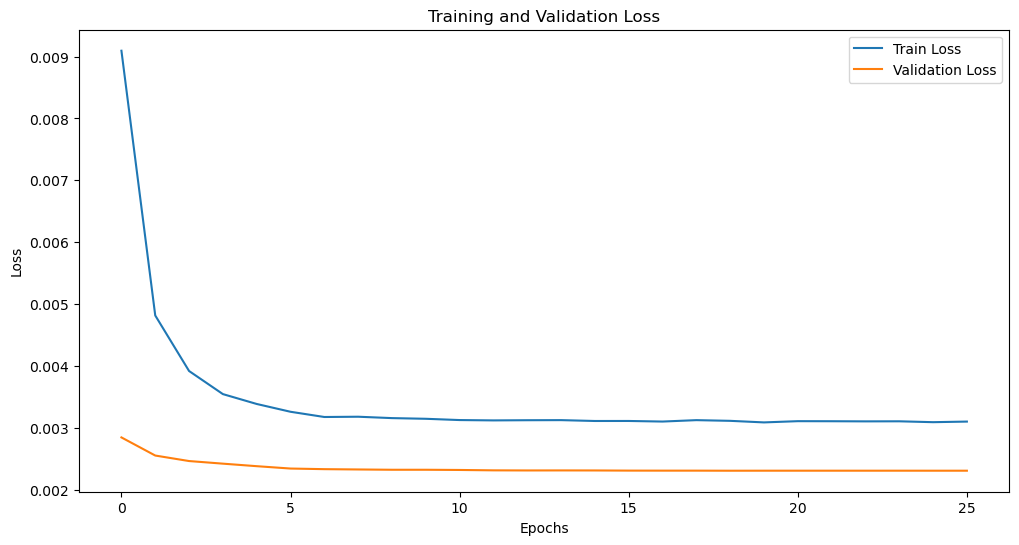

In [311]:
import importlib
import final_mlp
importlib.reload(final_mlp)
from final_mlp import FinalMLP

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, History
import category_encoders as ce
import matplotlib.pyplot as plt

data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Handle infinity and NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

# Encoding for categorical features
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Binary encoding for interaction features
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Normalization for dense features
if dense_features:
    mms = MinMaxScaler(feature_range=(0, 1))
    data[dense_features] = mms.fit_transform(data[dense_features])
    

# Top 20 
top_20_features = [
    'impressions', 'total_conversions', 'total_media_cost_advertiser_currency', 
    'device_browser_interaction_1', 'oneweb_testdrive_user', 'device_time_of_day_3', 
    'device_time_of_day_6', 'avg_conversion_rate_by_creative', 'line_item', 
    'time_of_day', 'device_time_of_day_4', 'creative_5', 'oneweb_contactform_lead', 
    'creative_4', 'avg_conversion_rate_by_device', 'carconfig_engager_to_user_ratio', 
    'line_item_time_of_day_1', 'avg_conversion_rate_by_operating_system', 
    'line_item_time_of_day_2', 'month_num'
]

# Include the target variable in the feature list
top_20_features.append('conversion_rate')

# Filter the data to include only the top 20 features and the target
data = data[top_20_features]
    
    


# Define input and target variables
X = data.drop(columns=['conversion_rate'])
y = data['conversion_rate'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorFlow dataset
def create_tf_dataset(X, y, batch_size=512):
    dataset = tf.data.Dataset.from_tensor_slices((X.values.astype(np.float32), y.astype(np.float32)))
    return dataset.batch(batch_size)

# Define and compile the model
def create_and_compile_model(num_features, num_embedding):
    if num_embedding > 0:
        model = FinalMLP(
            dim_input=num_features,
            num_embedding=num_embedding,
            dim_embedding=32,
            dim_hidden_fs=64,
            num_hidden_1=3,  # Increase the number of layers
            dim_hidden_1=256,  # Increase the number of units
            num_hidden_2=2,
            dim_hidden_2=128,  # Increase the number of units
            num_heads=1,
            dropout=0.1,  # Reduce dropout rate
        )
    else:
        # Simple MLP if no categorical features
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='relu', input_shape=(num_features,)),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(1)
        ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Reduce learning rate
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    return model

# Create datasets
train_data = create_tf_dataset(X_train, y_train)
test_data = create_tf_dataset(X_test, y_test)

num_features = X_train.shape[1]
num_embedding = sum(X[feat].nunique() for feat in X.columns if X[feat].dtype == 'object')

print(f"Number of features: {num_features}")
print(f"Number of unique categorical values: {num_embedding}")

model = create_and_compile_model(num_features, num_embedding)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # Increase patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)  # Adjust ReduceLROnPlateau
history = History()

# Train the model
model.fit(
    train_data,
    validation_data=test_data,
    epochs=50,  # Increase the number of epochs
    callbacks=[early_stopping, reduce_lr, history],
    verbose=1
)

# Evaluate on test set
y_pred = model.predict(X_test.values.astype(np.float32))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Results - MSE: {mse}, MAE: {mae}, R-squared: {r2}")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 5.DeepFM deepCTR 

### Base model

Epoch 1/100
68/68 - 3s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2/100
68/68 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 3/100
68/68 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/100
68/68 - 0s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/100
68/68 - 1s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0031 - val_mse: 0.0030
Epoch 6/100
68/68 - 1s - loss: 0.0025 - mse: 0.0024 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/100
68/68 - 1s - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/100
68/68 - 0s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 9/100
68/68 - 0s - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 10/100
68/68 - 0s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 11/100
68/68 - 0s - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 12/100
68/68 

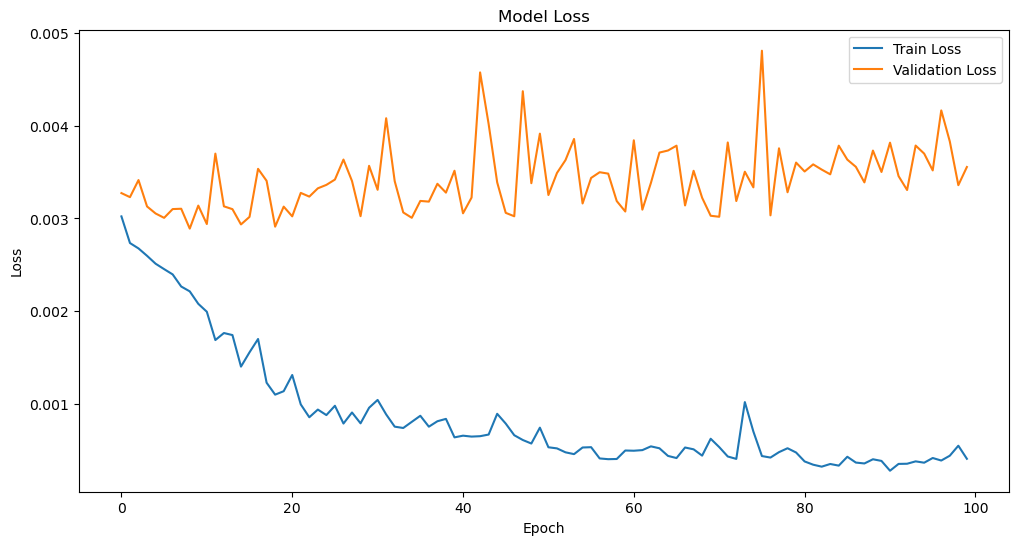

test mse 0.0022196492384455205
test mae 0.007051297024855496
test r2_score 0.35871122140640643


In [342]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import mean_squared_error

data = raw_se

# Define sparse and dense features based on data
sparse_features = raw_se.select_dtypes(include=['object']).columns.tolist()
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Fill missing values
data[sparse_features] = data[sparse_features].fillna('-1')
data[dense_features] = data[dense_features].fillna(0)
target = ['conversion_rate']

# Label Encoding for sparse features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

# Normalization for dense features
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Define feature columns
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=data[feat].max() + 1, embedding_dim=4)
                          for feat in sparse_features] + [DenseFeat(feat, 1) for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=2023)

# Generate input data for the model
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

# Define and compile the model for regression
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'])

# Train the model
history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=100, verbose=2, validation_split=0.2)

# Predict
pred_ans = model.predict(test_model_input, batch_size=256)

# Print predictions
# print(pred_ans)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


print("test mse", (mean_squared_error(test[target].values, pred_ans)))
print("test mae", (mean_absolute_error(test[target].values, pred_ans)))
print("test r2_score", (r2_score(test[target].values, pred_ans)))


### Improve model

Epoch 1/100
68/68 - 1s - loss: 0.0308 - mse: 0.0307 - val_loss: 0.0097 - val_mse: 0.0096
Epoch 2/100
68/68 - 0s - loss: 0.0115 - mse: 0.0113 - val_loss: 0.0058 - val_mse: 0.0057
Epoch 3/100
68/68 - 0s - loss: 0.0079 - mse: 0.0078 - val_loss: 0.0051 - val_mse: 0.0050
Epoch 4/100
68/68 - 0s - loss: 0.0062 - mse: 0.0060 - val_loss: 0.0049 - val_mse: 0.0048
Epoch 5/100
68/68 - 0s - loss: 0.0052 - mse: 0.0051 - val_loss: 0.0045 - val_mse: 0.0044
Epoch 6/100
68/68 - 0s - loss: 0.0047 - mse: 0.0046 - val_loss: 0.0043 - val_mse: 0.0042
Epoch 7/100
68/68 - 0s - loss: 0.0042 - mse: 0.0041 - val_loss: 0.0040 - val_mse: 0.0039
Epoch 8/100
68/68 - 0s - loss: 0.0041 - mse: 0.0039 - val_loss: 0.0044 - val_mse: 0.0042
Epoch 9/100
68/68 - 0s - loss: 0.0039 - mse: 0.0038 - val_loss: 0.0039 - val_mse: 0.0038
Epoch 10/100
68/68 - 0s - loss: 0.0037 - mse: 0.0036 - val_loss: 0.0041 - val_mse: 0.0040
Epoch 11/100
68/68 - 0s - loss: 0.0036 - mse: 0.0034 - val_loss: 0.0041 - val_mse: 0.0040
Epoch 12/100
68/68 

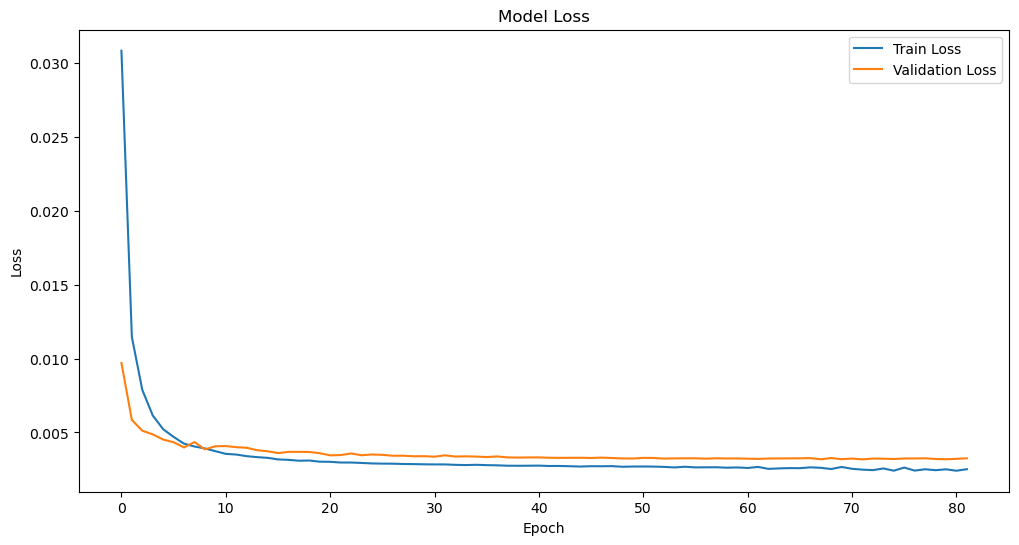

Test MSE: 0.0031569230023776097
Test MAE: 0.012600282374108636
Test R2 Score: 0.08791927064720895


In [320]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

data = raw_se

# Define sparse and dense features
sparse_features = raw_se.select_dtypes(include=['object']).columns.tolist()
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Fill missing values
data[sparse_features] = data[sparse_features].fillna('-1')
data[dense_features] = data[dense_features].fillna(0)
target = ['conversion_rate']

# Label Encoding for sparse features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

# Normalization for dense features 
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Define feature columns with reduced regularization
embedding_dim = 8  # Increased embedding dimension for better feature interaction
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=data[feat].max() + 1, embedding_dim=embedding_dim)
                          for feat in sparse_features] + [DenseFeat(feat, 1) for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=2023)

# Generate input data for the model
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

# Define and compile the model with reduced L2 regularization and dropout
model = DeepFM(
    linear_feature_columns=linear_feature_columns,
    dnn_feature_columns=dnn_feature_columns,
    task='regression',
    dnn_hidden_units=(128, 64),  # Adjusted hidden layer sizes
    dnn_dropout=0.3,  # Reduced dropout to prevent underfitting
    l2_reg_linear=1e-6,  # Lowered L2 regularization for linear part
    l2_reg_embedding=1e-6,  # Lowered L2 regularization for embeddings
    l2_reg_dnn=1e-6  # Lowered L2 regularization for DNN
)

model.compile("adam", "mse", metrics=['mse'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_model_input,
    train[target].values,
    batch_size=256,
    epochs=100,
    verbose=2,
    validation_split=0.2,
    callbacks=[early_stopping]  # Apply early stopping
)

# Predict
pred_ans = model.predict(test_model_input, batch_size=256)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model
mse = mean_squared_error(test[target].values, pred_ans)
mae = mean_absolute_error(test[target].values, pred_ans)
r2 = r2_score(test[target].values, pred_ans)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test R2 Score: {r2}")



### Improve model with encoding

Epoch 1/50
68/68 - 18s - loss: 0.2594 - mse: 0.0085 - mae: 0.0455 - val_loss: 0.0965 - val_mse: 0.0047 - val_mae: 0.0186
Epoch 2/50
68/68 - 1s - loss: 0.0562 - mse: 0.0031 - mae: 0.0192 - val_loss: 0.0349 - val_mse: 0.0045 - val_mae: 0.0153
Epoch 3/50
68/68 - 1s - loss: 0.0248 - mse: 0.0029 - mae: 0.0169 - val_loss: 0.0202 - val_mse: 0.0046 - val_mae: 0.0239
Epoch 4/50
68/68 - 1s - loss: 0.0151 - mse: 0.0028 - mae: 0.0164 - val_loss: 0.0138 - val_mse: 0.0043 - val_mae: 0.0162
Epoch 5/50
68/68 - 1s - loss: 0.0104 - mse: 0.0028 - mae: 0.0149 - val_loss: 0.0107 - val_mse: 0.0045 - val_mae: 0.0200
Epoch 6/50
68/68 - 1s - loss: 0.0079 - mse: 0.0027 - mae: 0.0148 - val_loss: 0.0088 - val_mse: 0.0045 - val_mae: 0.0211
Epoch 7/50
68/68 - 1s - loss: 0.0064 - mse: 0.0027 - mae: 0.0141 - val_loss: 0.0073 - val_mse: 0.0042 - val_mae: 0.0139
Epoch 8/50
68/68 - 1s - loss: 0.0054 - mse: 0.0027 - mae: 0.0149 - val_loss: 0.0067 - val_mse: 0.0044 - val_mae: 0.0222
Epoch 9/50
68/68 - 1s - loss: 0.0049 - 

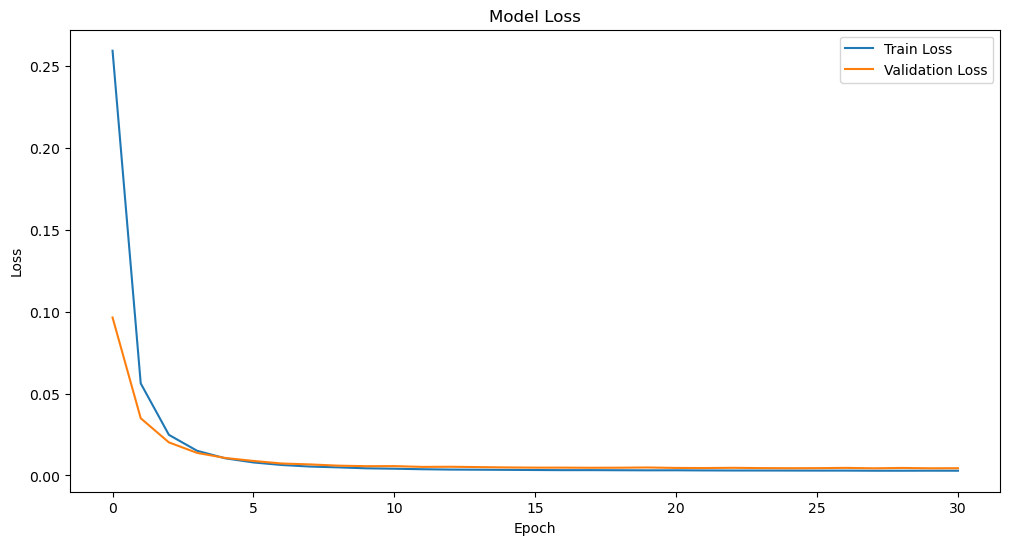

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
import category_encoders as ce
import numpy as np

# Load data
data = mlp_df.copy()

# Drop columns with only one unique value
# data.drop(['insertion_order', 'campaign', 'month'], axis=1, inplace=True)

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Fill missing values
data[sparse_features] = data[sparse_features].fillna('-1')
data[dense_features] = data[dense_features].fillna(0)

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ensure no NaN values
data.fillna(0, inplace=True)

target = ['conversion_rate']

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Remove any remaining infinity values
for col in dense_features:
    data[col] = data[col].apply(lambda x: 0 if np.isinf(x) else x)

# Normalization for dense features
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Re-identify sparse and dense features after encoding
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + target]
dense_features_after_encoding = dense_features

# Define feature columns
embedding_dim = 8  # Increased embedding dimension for better representation
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=int(data[feat].max()) + 1, embedding_dim=embedding_dim)
                          for feat in sparse_features_after_encoding] + [DenseFeat(feat, 1) for feat in dense_features_after_encoding]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=2023)

# Generate input data for the model
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

# Define and compile the model for regression
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression',
               dnn_hidden_units=(256, 128), l2_reg_linear=0.001, l2_reg_embedding=0.001, l2_reg_dnn=0.001)
model.compile("adam", "mse", metrics=['mse', 'mae'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=50, verbose=2, validation_split=0.2,
                    callbacks=[early_stopping])

# Predict
pred_ans = model.predict(test_model_input, batch_size=256)

# Calculate and print metrics
mse = mean_squared_error(test[target].values, pred_ans)
mae = mean_absolute_error(test[target].values, pred_ans)
print(f'MSE: {mse}, MAE: {mae}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [482]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("test mse", (mean_squared_error(test[target].values, pred_ans)))
print("test mae", (mean_absolute_error(test[target].values, pred_ans)))
print("test r2_score", (r2_score(test[target].values, pred_ans)))



test mse 0.003384057184371605
test mae 0.011462691677423982
test r2_score 0.010985149646738024


### Filter out 20 feature

Epoch 1/50
68/68 - 3s - loss: 0.2004 - mse: 0.0145 - mae: 0.0624 - val_loss: 0.1083 - val_mse: 0.0046 - val_mae: 0.0189
Epoch 2/50
68/68 - 0s - loss: 0.0730 - mse: 0.0029 - mae: 0.0157 - val_loss: 0.0509 - val_mse: 0.0043 - val_mae: 0.0153
Epoch 3/50
68/68 - 0s - loss: 0.0388 - mse: 0.0028 - mae: 0.0166 - val_loss: 0.0322 - val_mse: 0.0044 - val_mae: 0.0209
Epoch 4/50
68/68 - 0s - loss: 0.0261 - mse: 0.0028 - mae: 0.0153 - val_loss: 0.0239 - val_mse: 0.0046 - val_mae: 0.0215
Epoch 5/50
68/68 - 0s - loss: 0.0195 - mse: 0.0028 - mae: 0.0161 - val_loss: 0.0187 - val_mse: 0.0043 - val_mae: 0.0198
Epoch 6/50
68/68 - 0s - loss: 0.0154 - mse: 0.0027 - mae: 0.0147 - val_loss: 0.0152 - val_mse: 0.0042 - val_mae: 0.0114
Epoch 7/50
68/68 - 0s - loss: 0.0125 - mse: 0.0027 - mae: 0.0139 - val_loss: 0.0129 - val_mse: 0.0042 - val_mae: 0.0147
Epoch 8/50
68/68 - 0s - loss: 0.0105 - mse: 0.0027 - mae: 0.0131 - val_loss: 0.0111 - val_mse: 0.0041 - val_mae: 0.0098
Epoch 9/50
68/68 - 1s - loss: 0.0090 - m

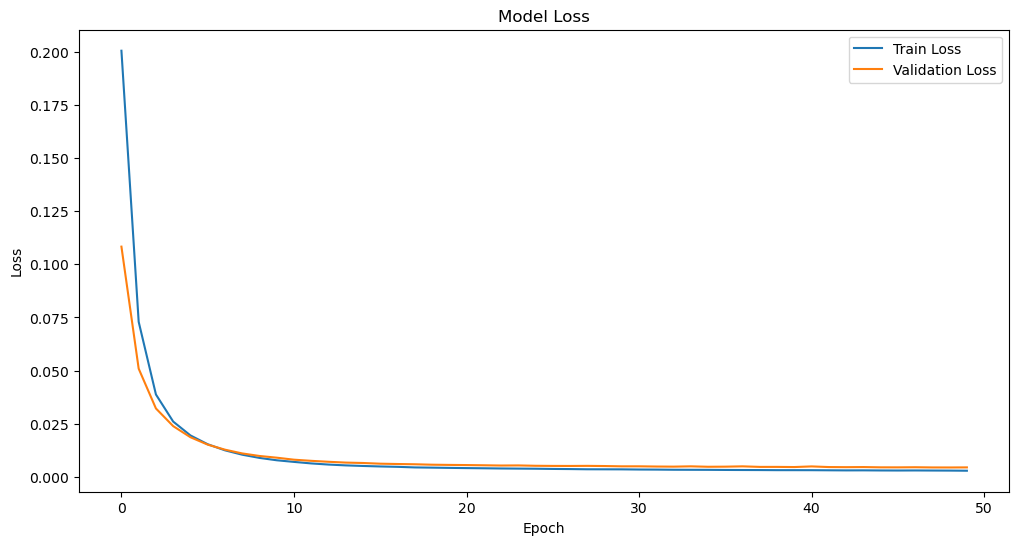

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
import category_encoders as ce
import numpy as np

data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Fill missing values
data[sparse_features] = data[sparse_features].fillna('-1')
data[dense_features] = data[dense_features].fillna(0)

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ensure no NaN values
data.fillna(0, inplace=True)

target = ['conversion_rate']

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Remove any remaining infinity values
for col in dense_features:
    data[col] = data[col].apply(lambda x: 0 if np.isinf(x) else x)

# Normalization for dense features
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Re-identify sparse and dense features after encoding
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + target]
dense_features_after_encoding = dense_features

# Filter only the top 20 features (plus the target variable)
top_20_features = [
    'impressions', 'total_conversions', 'total_media_cost_advertiser_currency', 
    'device_browser_interaction_1', 'oneweb_testdrive_user', 'device_time_of_day_3', 
    'device_time_of_day_6', 'avg_conversion_rate_by_creative', 'line_item', 
    'time_of_day', 'device_time_of_day_4', 'creative_5', 'oneweb_contactform_lead', 
    'creative_4', 'avg_conversion_rate_by_device', 'carconfig_engager_to_user_ratio', 
    'line_item_time_of_day_1', 'avg_conversion_rate_by_operating_system', 
    'line_item_time_of_day_2', 'month_num', 'conversion_rate'
]

# Filter the data to include only the top 20 features and the target
data = data[top_20_features]

# Re-identify sparse and dense features after filtering
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + target]
dense_features_after_encoding = [col for col in dense_features if col in data.columns]

# Define feature columns
embedding_dim = 8  # Increased embedding dimension for better representation
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=int(data[feat].max()) + 1, embedding_dim=embedding_dim)
                          for feat in sparse_features_after_encoding] + [DenseFeat(feat, 1) for feat in dense_features_after_encoding]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=2023)

# Generate input data for the model
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

# Define and compile the model for regression
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression',
               dnn_hidden_units=(256, 128), l2_reg_linear=0.001, l2_reg_embedding=0.001, l2_reg_dnn=0.001)
model.compile("adam", "mse", metrics=['mse', 'mae'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=50, verbose=2, validation_split=0.2,
                    callbacks=[early_stopping])

# Predict
pred_ans = model.predict(test_model_input, batch_size=256)

# Calculate and print metrics
mse = mean_squared_error(test[target].values, pred_ans)
mae = mean_absolute_error(test[target].values, pred_ans)
print(f'MSE: {mse}, MAE: {mae}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("test mse", (mean_squared_error(test[target].values, pred_ans)))
print("test mae", (mean_absolute_error(test[target].values, pred_ans)))
print("test r2_score", (r2_score(test[target].values, pred_ans)))



### Keras Tuner

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import mean_squared_error
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load data
data = df.copy()

# Define sparse and dense features based on data
sparse_features = data.select_dtypes(include=['object']).columns.tolist()
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with 0 (or handle accordingly)
data.fillna(0, inplace=True)

target = ['conversion_rate']

# Label Encoding for sparse features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

# Normalization for dense features
# mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Define feature columns
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=int(data[feat].max() + 1), embedding_dim=4)
                          for feat in sparse_features] + [DenseFeat(feat, 1) for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=2023)

# Generate input data for the model
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

# Define a custom Keras model class to wrap DeepFM
class CustomDeepFM(Model):
    def __init__(self, linear_feature_columns, dnn_feature_columns, dnn_hidden_units, l2_reg_linear, l2_reg_embedding, l2_reg_dnn, dnn_dropout):
        super(CustomDeepFM, self).__init__()
        self.deepfm = DeepFM(linear_feature_columns=linear_feature_columns,
                             dnn_feature_columns=dnn_feature_columns,
                             task='regression',
                             dnn_hidden_units=dnn_hidden_units,
                             l2_reg_linear=l2_reg_linear,
                             l2_reg_embedding=l2_reg_embedding,
                             l2_reg_dnn=l2_reg_dnn,
                             dnn_dropout=dnn_dropout)
    
    def call(self, inputs):
        return self.deepfm(inputs)

# Define a model-building function for Keras Tuner
def build_model(hp):
    model = CustomDeepFM(
        linear_feature_columns=linear_feature_columns,
        dnn_feature_columns=dnn_feature_columns,
        dnn_hidden_units=[hp.Int('units', min_value=32, max_value=512, step=32) for _ in range(hp.Int('layers', 1, 3))],
        l2_reg_linear=hp.Float('l2_reg_linear', 1e-5, 1e-2, sampling='LOG'),
        l2_reg_embedding=hp.Float('l2_reg_embedding', 1e-5, 1e-2, sampling='LOG'),
        l2_reg_dnn=hp.Float('l2_reg_dnn', 1e-5, 1e-2, sampling='LOG'),
        dnn_dropout=hp.Float('dnn_dropout', 0, 0.5, step=0.1),
    )
    model.compile(optimizer="adam", loss="mse", metrics=['mse'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_mse',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='deepfm_tuning'
)

# Search for the best hyperparameters
tuner.search(train_model_input, train[target].values, 
             epochs=10, 
             validation_split=0.2, 
             batch_size=256, 
             verbose=2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"""
The optimal number of units in each dense layer is {best_hps.get('units')}.
The optimal number of layers is {best_hps.get('layers')}.
The optimal l2 regularization for linear is {best_hps.get('l2_reg_linear')}.
The optimal l2 regularization for embedding is {best_hps.get('l2_reg_embedding')}.
The optimal l2 regularization for dnn is {best_hps.get('l2_reg_dnn')}.
The optimal dnn dropout is {best_hps.get('dnn_dropout')}.
""")

# Build the model with the best hyperparameters and train it
model = build_model(best_hps)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=100, verbose=2, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Predict
pred_ans = model.predict(test_model_input, batch_size=256)

# Evaluate the model
mse = mean_squared_error(test[target].values, pred_ans)
print(f"Mean Squared Error (MSE): {mse}")

# Print predictions
print(pred_ans)


Reloading Tuner from my_dir\deepfm_tuning\tuner0.json

The optimal number of units in each dense layer is 352.
The optimal number of layers is 2.
The optimal l2 regularization for linear is 0.009086737515086403.
The optimal l2 regularization for embedding is 4.20502891452352e-05.
The optimal l2 regularization for dnn is 6.160547192067415e-05.
The optimal dnn dropout is 0.2.

Epoch 1/100
68/68 - 3s - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0032 - val_mse: 0.0032 - lr: 0.0010 - 3s/epoch - 41ms/step
Epoch 2/100
68/68 - 0s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0031 - val_mse: 0.0031 - lr: 0.0010 - 341ms/epoch - 5ms/step
Epoch 3/100
68/68 - 0s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0032 - val_mse: 0.0032 - lr: 0.0010 - 322ms/epoch - 5ms/step
Epoch 4/100
68/68 - 0s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0030 - val_mse: 0.0030 - lr: 0.0010 - 350ms/epoch - 5ms/step
Epoch 5/100
68/68 - 0s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0031 - val_mse: 0.0031 - lr: 0.0010 - 358ms/epoch 

In [317]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("test mse", (mean_squared_error(test[target].values, pred_ans)))
print("test mae", (mean_absolute_error(test[target].values, pred_ans)))
print("test r2_score", (r2_score(test[target].values, pred_ans)))


test mse 0.0034144523652519312
test mae 0.016108084927454833
test r2_score 0.00210194122796592


#### Keras tune with engineered feature

Reloading Tuner from my_dir\deepfm_tuning\tuner0.json

The optimal number of units in each dense layer is 352.
The optimal number of layers is 2.
The optimal l2 regularization for linear is 0.009086737515086403.
The optimal l2 regularization for embedding is 4.20502891452352e-05.
The optimal l2 regularization for dnn is 6.160547192067415e-05.
The optimal dnn dropout is 0.2.

Epoch 1/100
68/68 - 17s - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0042 - val_mse: 0.0042 - lr: 0.0010 - 17s/epoch - 245ms/step
Epoch 2/100
68/68 - 1s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0041 - val_mse: 0.0041 - lr: 0.0010 - 1s/epoch - 19ms/step
Epoch 3/100
68/68 - 1s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0041 - val_mse: 0.0041 - lr: 0.0010 - 1s/epoch - 20ms/step
Epoch 4/100
68/68 - 1s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0040 - val_mse: 0.0040 - lr: 0.0010 - 1s/epoch - 20ms/step
Epoch 5/100
68/68 - 1s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0041 - val_mse: 0.0041 - lr: 0.0010 - 1s/epoch - 19ms

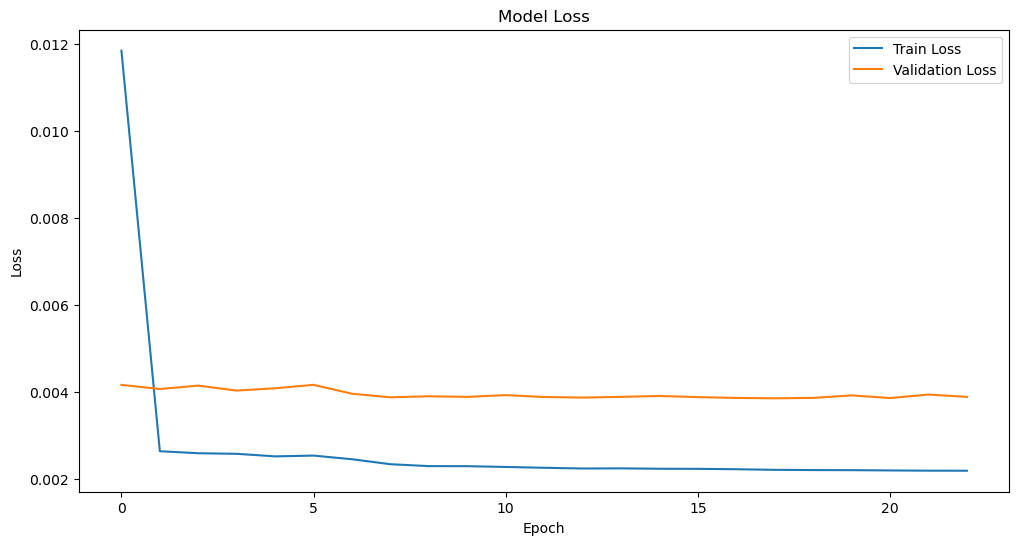

In [411]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model

data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with 0 (or handle accordingly)
data.fillna(0, inplace=True)

target = ['conversion_rate']

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding 
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Normalization for dense features
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Re-identify sparse and dense features after encoding
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + target]
dense_features_after_encoding = dense_features

# Define feature columns
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=int(data[feat].max() + 1), embedding_dim=4)
                          for feat in sparse_features_after_encoding] + [DenseFeat(feat, 1) for feat in dense_features_after_encoding]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=2023)

# Generate input data for the model
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

#### MODEL IMPLEMENT

# Define a custom Keras model class to wrap DeepFM
class CustomDeepFM(Model):
    def __init__(self, linear_feature_columns, dnn_feature_columns, dnn_hidden_units, l2_reg_linear, l2_reg_embedding, l2_reg_dnn, dnn_dropout):
        super(CustomDeepFM, self).__init__()
        self.deepfm = DeepFM(linear_feature_columns=linear_feature_columns,
                             dnn_feature_columns=dnn_feature_columns,
                             task='regression',
                             dnn_hidden_units=dnn_hidden_units,
                             l2_reg_linear=l2_reg_linear,
                             l2_reg_embedding=l2_reg_embedding,
                             l2_reg_dnn=l2_reg_dnn,
                             dnn_dropout=dnn_dropout)
    
    def call(self, inputs):
        return self.deepfm(inputs)

# Define a model-building function for Keras Tuner
def build_model(hp):
    model = CustomDeepFM(
        linear_feature_columns=linear_feature_columns,
        dnn_feature_columns=dnn_feature_columns,
        dnn_hidden_units=[hp.Int('units', min_value=32, max_value=512, step=32) for _ in range(hp.Int('layers', 1, 3))],
        l2_reg_linear=hp.Float('l2_reg_linear', 1e-5, 1e-2, sampling='LOG'),
        l2_reg_embedding=hp.Float('l2_reg_embedding', 1e-5, 1e-2, sampling='LOG'),
        l2_reg_dnn=hp.Float('l2_reg_dnn', 1e-5, 1e-2, sampling='LOG'),
        dnn_dropout=hp.Float('dnn_dropout', 0, 0.5, step=0.1),
    )
    model.compile(optimizer="adam", loss="mse", metrics=['mse'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_mse',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='deepfm_tuning'
)

# Search for the best hyperparameters
tuner.search(train_model_input, train[target].values, 
             epochs=10, 
             validation_split=0.2, 
             batch_size=256, 
             verbose=2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"""
The optimal number of units in each dense layer is {best_hps.get('units')}.
The optimal number of layers is {best_hps.get('layers')}.
The optimal l2 regularization for linear is {best_hps.get('l2_reg_linear')}.
The optimal l2 regularization for embedding is {best_hps.get('l2_reg_embedding')}.
The optimal l2 regularization for dnn is {best_hps.get('l2_reg_dnn')}.
The optimal dnn dropout is {best_hps.get('dnn_dropout')}.
""")

# Build the model with the best hyperparameters and train it
model = build_model(best_hps)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=100, verbose=2, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Predict
pred_ans = model.predict(test_model_input, batch_size=256)

# Evaluate the model
mse = mean_squared_error(test[target].values, pred_ans)
print(f"Mean Squared Error (MSE): {mse}")

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("test mse", (mean_squared_error(test[target].values, pred_ans)))
print("test mae", (mean_absolute_error(test[target].values, pred_ans)))
print("test r2_score", (r2_score(test[target].values, pred_ans)))


test mse 0.016104514614078223
test mae 0.042773760680388274
test r2_score 0.0997861685736765


#### Keras tune and filter top 20 feature

Reloading Tuner from my_dir\deepfm_tuning\tuner0.json

The optimal number of units in each dense layer is 352.
The optimal number of layers is 2.
The optimal l2 regularization for linear is 0.009086737515086403.
The optimal l2 regularization for embedding is 4.20502891452352e-05.
The optimal l2 regularization for dnn is 6.160547192067415e-05.
The optimal dnn dropout is 0.2.

Epoch 1/100
68/68 - 4s - loss: 0.0165 - mse: 0.0165 - mae: 0.0615 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0157 - lr: 0.0010 - 4s/epoch - 55ms/step
Epoch 2/100
68/68 - 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0116 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0087 - lr: 0.0010 - 667ms/epoch - 10ms/step
Epoch 3/100
68/68 - 1s - loss: 0.0025 - mse: 0.0025 - mae: 0.0115 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0112 - lr: 0.0010 - 846ms/epoch - 12ms/step
Epoch 4/100
68/68 - 1s - loss: 0.0025 - mse: 0.0025 - mae: 0.0107 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0111 - lr: 0.0010 - 684ms/epo

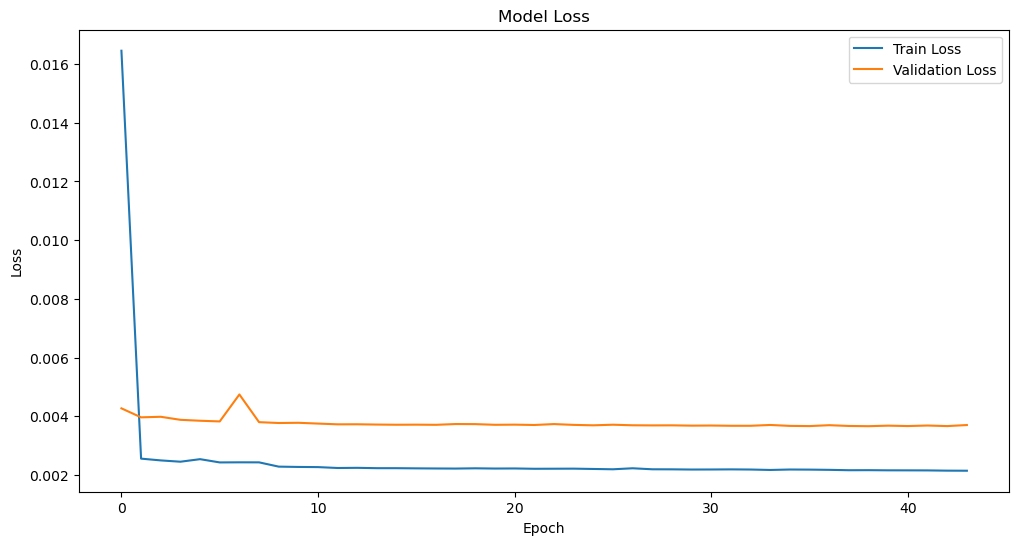

In [479]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import category_encoders as ce
import numpy as np
import keras_tuner as kt
from tensorflow.keras.models import Model

# Load data
data = mlp_df.copy()

# Identify sparse (categorical) features by data type
sparse_features = data.select_dtypes(include=['object']).columns.tolist()

# Define dense (numerical) features by excluding sparse features and the target variable 'conversion_rate'
dense_features = [col for col in data.columns if col not in sparse_features + ['conversion_rate']]

# Fill missing values
data[sparse_features] = data[sparse_features].fillna('-1')
data[dense_features] = data[dense_features].fillna(0)

# Check for infinity values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ensure no NaN values
data.fillna(0, inplace=True)

target = ['conversion_rate']

# Apply target encoding for 'line_item'
if 'line_item' in data.columns:
    target_encoder = ce.TargetEncoder(cols=['line_item'])
    data = target_encoder.fit_transform(data, data['conversion_rate'])

# Apply binary encoding for 'creative'
if 'creative' in data.columns:
    binary_encoder = ce.BinaryEncoder(cols=['creative'])
    data = binary_encoder.fit_transform(data)

# Apply one-hot encoding using pd.get_dummies 
one_hot_columns = ['device_type', 'browser', 'environment', 'operating_system', 'environment_device']
one_hot_columns = [col for col in one_hot_columns if col in data.columns]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Clean column names
data.columns = [col.replace(' ', '_').replace('/', '_') for col in data.columns]

# Apply label encoding for
label_encode_columns = ['time_of_day', 'season', 'part_of_day']
label_encoders = {}
for col in label_encode_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Apply binary encoding for engineered interaction features with higher unique values
interaction_features_binary = ['device_browser_interaction', 'creative_environment_interaction', 'device_time_of_day', 
                               'browser_os', 'creative_line_item', 'line_item_time_of_day', 'os_device']
interaction_features_binary = [col for col in interaction_features_binary if col in data.columns]
if interaction_features_binary:
    binary_encoder = ce.BinaryEncoder(cols=interaction_features_binary)
    data = binary_encoder.fit_transform(data)

# Ensure no duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Remove any remaining infinity values
for col in dense_features:
    data[col] = data[col].apply(lambda x: 0 if np.isinf(x) else x)

# Normalization for dense features
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# Re-identify sparse and dense features after encoding
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + target]
dense_features_after_encoding = dense_features

# Filter only the top 20 features (plus the target variable)
top_20_features = [
    'impressions', 'total_conversions', 'total_media_cost_advertiser_currency', 
    'device_browser_interaction_1', 'oneweb_testdrive_user', 'device_time_of_day_3', 
    'device_time_of_day_6', 'avg_conversion_rate_by_creative', 'line_item', 
    'time_of_day', 'device_time_of_day_4', 'creative_5', 'oneweb_contactform_lead', 
    'creative_4', 'avg_conversion_rate_by_device', 'carconfig_engager_to_user_ratio', 
    'line_item_time_of_day_1', 'avg_conversion_rate_by_operating_system', 
    'line_item_time_of_day_2', 'month_num', 'conversion_rate'
]

# Filter the data to include only the top 20 features and the target
data = data[top_20_features]

# Re-identify sparse and dense features after filtering
sparse_features_after_encoding = [col for col in data.columns if col not in dense_features + target]
dense_features_after_encoding = [col for col in dense_features if col in data.columns]

# Define feature columns
embedding_dim = 8  # Increased embedding dimension for better representation
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=int(data[feat].max()) + 1, embedding_dim=embedding_dim)
                          for feat in sparse_features_after_encoding] + [DenseFeat(feat, 1) for feat in dense_features_after_encoding]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=2023)

# Generate input data for the model
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

#### MODEL IMPLEMENT

# Define a custom Keras model class to wrap DeepFM
class CustomDeepFM(Model):
    def __init__(self, linear_feature_columns, dnn_feature_columns, dnn_hidden_units, l2_reg_linear, l2_reg_embedding, l2_reg_dnn, dnn_dropout):
        super(CustomDeepFM, self).__init__()
        self.deepfm = DeepFM(linear_feature_columns=linear_feature_columns,
                             dnn_feature_columns=dnn_feature_columns,
                             task='regression',
                             dnn_hidden_units=dnn_hidden_units,
                             l2_reg_linear=l2_reg_linear,
                             l2_reg_embedding=l2_reg_embedding,
                             l2_reg_dnn=l2_reg_dnn,
                             dnn_dropout=dnn_dropout)
    
    def call(self, inputs):
        return self.deepfm(inputs)

# Define a model-building function for Keras Tuner
def build_model(hp):
    model = CustomDeepFM(
        linear_feature_columns=linear_feature_columns,
        dnn_feature_columns=dnn_feature_columns,
        dnn_hidden_units=[hp.Int('units', min_value=32, max_value=512, step=32) for _ in range(hp.Int('layers', 1, 3))],
        l2_reg_linear=hp.Float('l2_reg_linear', 1e-5, 1e-2, sampling='LOG'),
        l2_reg_embedding=hp.Float('l2_reg_embedding', 1e-5, 1e-2, sampling='LOG'),
        l2_reg_dnn=hp.Float('l2_reg_dnn', 1e-5, 1e-2, sampling='LOG'),
        dnn_dropout=hp.Float('dnn_dropout', 0, 0.5, step=0.1),
    )
    model.compile(optimizer="adam", loss="mse", metrics=['mse', 'mae'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_mse',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='deepfm_tuning'
)

# Search for the best hyperparameters
tuner.search(train_model_input, train[target].values, 
             epochs=10, 
             validation_split=0.2, 
             batch_size=256, 
             verbose=2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"""
The optimal number of units in each dense layer is {best_hps.get('units')}.
The optimal number of layers is {best_hps.get('layers')}.
The optimal l2 regularization for linear is {best_hps.get('l2_reg_linear')}.
The optimal l2 regularization for embedding is {best_hps.get('l2_reg_embedding')}.
The optimal l2 regularization for dnn is {best_hps.get('l2_reg_dnn')}.
The optimal dnn dropout is {best_hps.get('dnn_dropout')}.
""")

# Build the model with the best hyperparameters and train it
model = build_model(best_hps)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=100, verbose=2, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Predict
pred_ans = model.predict(test_model_input, batch_size=256)

# Calculate and print metrics
mse = mean_squared_error(test[target].values, pred_ans)
mae = mean_absolute_error(test[target].values, pred_ans)
print(f'MSE: {mse}, MAE: {mae}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [480]:
print("test mse", (mean_squared_error(test[target].values, pred_ans)))
print("test mae", (mean_absolute_error(test[target].values, pred_ans)))
print("test r2_score", (r2_score(test[target].values, pred_ans)))


test mse 0.0031039305363078393
test mae 0.009119039557934118
test r2_score 0.09285416066529506
